In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import os
import math
%matplotlib inline

In [2]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams.update({'font.size': 20})

In [40]:
def plotHeatmap(x,y,nbin,xlabel='',ylabel='',title='',hold=False):

    [HH,xh,yh] = np.histogram2d(x,y,bins=(nbin,nbin))
    HH = HH.T/(1.)
    xmin,xmax=xh[0],xh[-1]
    ymin,ymax=yh[0],yh[-1]
    plt.imshow(HH,interpolation='nearest',origin='low',extent=[xmin,xmax,ymin,ymax],aspect='auto',cmap='gnuplot2_r')#,cmap='jet',vmin=0.,vmax=100,aspect='auto')
    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    plt.title(title)   
    if not hold:
        plt.show()
    plt.close()
    return [HH,xh,yh]

In [41]:
def stateThresholds():
    ''''''
    return {'Zeb mRNA':[ 62+(301-62)/2.,301+(990-301)/2.]
            ,'$\mu_{200}$':[1265+(12389-1265)/2.,12389+(19098-12389)/2.],
            'Hif-1':[26+(292-26)/2.,292+(490-292)/2.],
            'AMPK':[69+(327-69)/2.,327+(436-327)/2.]}

In [42]:
def getStates_fromMap(df_res,hold=False):

    x2 = df_res['A']
    y1 = df_res['h']
    x1 = df_res['u']
    y2 = df_res['mz']
    hm1= plotHeatmap(x1,y1,10,'$\mu_{200}$','Hif-1','Steady States',hold)
    hm2 =plotHeatmap(x2,y2,10,'AMPK','Zeb mRNA','Steady States',hold)
    res2,res1={'n':[],'u':[],'mz':[]},{'n':[],'A':[],'h':[]}
    
    thresh = stateThresholds()
            
    E = (df_res['u']>thresh['$\mu_{200}$'][1])*(df_res['mz']<=thresh['Zeb mRNA'][0])
    M = (df_res['u']<=thresh['$\mu_{200}$'][0])*(df_res['mz']>thresh['Zeb mRNA'][1])
    EM =(df_res['u']>thresh['$\mu_{200}$'][0])*(df_res['u']<=thresh['$\mu_{200}$'][1])*(df_res['mz']>thresh['Zeb mRNA'][0])*(df_res['mz']<=thresh['Zeb mRNA'][1])
    
    
    O = (df_res['A']>thresh['AMPK'][1])*(df_res['h']<=thresh['Hif-1'][0])
    W = (df_res['A']<=thresh['AMPK'][0])*(df_res['h']>thresh['Hif-1'][1])
    WO =(df_res['A']>thresh['AMPK'][0])*(df_res['A']<=thresh['AMPK'][1])*(df_res['h']>thresh['Hif-1'][0])*(df_res['h']<=thresh['Hif-1'][1])
    
    
    #print E,M,EM,E+EM+M,np.sum(df_res['u']>=-11)
    #print O,W,WO,O+W+WO
    
    tmp = np.sum(E)+np.sum(EM)+np.sum(M)+np.sum(O)+np.sum(WO)+np.sum(W)
    resultsS = {'name':['E','EM','M','O','WO','W','unknown'],
                'amount':[np.sum(E),np.sum(EM),np.sum(M),np.sum(O),np.sum(WO),np.sum(W),len(df_res['Z'])-tmp]}
    
    tmp = np.sum(E*O)+np.sum(E*WO)+np.sum(E*W)+np.sum(EM*O)+np.sum(EM*WO)+np.sum(EM*W)+np.sum(M*O)+np.sum(M*WO)+np.sum(M*W)
    resultsE = {}
    resultsE = {'name':['E/O','E/WO','E/W','EM/O','EM/WO','EM/W','M/O','M/WO','M/W','unknown'],
                'amount':[np.sum(E*O),np.sum(E*WO),np.sum(E*W),np.sum(EM*O),np.sum(EM*WO),np.sum(EM*W),np.sum(M*O),np.sum(M*WO),np.sum(M*W),len(df_res['Z'])-tmp]}
    maxV = np.max(resultsE['amount'])
    #print np.sum(resultsE['amount']),len(df_res['Z'])
    return resultsE,resultsS,maxV

In [43]:
def plotRes(filename):
    df_res = pd.read_csv(filename).dropna()  
    mapResE,mapResS,maxC =getStates_fromMap(df_res)
    
    my_cmap = mpl.cm.get_cmap('rainbow')#gist_ncar')
    my_norm = Normalize(vmin=0, vmax=maxC)
    #ax.bar(range(8), rand(8), color=my_cmap(my_norm(data)))
    '''
    xvals = np.arange(0,len(mapRes['amount']))
    plt.bar(xvals,mapRes['amount'],color=my_cmap(my_norm(mapRes['amount'])))
    plt.xticks(xvals,mapRes['name'],rotation=80)
    plt.yscale("log")
    plt.xlabel("Steady state")
    plt.ylabel("Number of Initial Conditions")
    plt.show()
    plt.close()
    '''
    
    fig = plt.figure()
    xvals = np.arange(0,len(mapResE['amount']))
    plt.bar(xvals,mapResE['amount'],color=my_cmap(my_norm(mapResE['amount'])))
    plt.xticks(xvals,mapResE['name'],rotation=80)
    plt.yscale("log")
    plt.xlabel("Steady state")
    plt.ylabel("Number of Initial Conditions")
    title = filename.replace("res","emt")
    title = title.replace("txt","png")
    print title
    #fig.savefig(title,bbox_inches='tight')
    plt.show()
    plt.close()

    '''
    fig = plt.figure()
    xvals = np.arange(0,len(mapResM['amount']))
    plt.bar(xvals,mapResM['amount'],color=my_cmap(my_norm(mapResM['amount'])))
    plt.xticks(xvals,mapResM['name'],rotation=80)
    plt.yscale("log")
    plt.xlabel("Steady state")
    plt.ylabel("Number of Initial Conditions")
    title = filename.replace("txt","png")
    title = title.replace("res","mr")
    print title
    fig.savefig(title,bbox_inches='tight')
    '''
    
    plt.show()


In [47]:
def plotCoupled(results):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(30,30))
    plt.subplots_adjust(hspace=0.3)
    
    ax1.bar(np.arange(0,len(results['E/O'][0])),results['E/O'][1],yerr =results['E/O'][2])#, width=100)#,'*-',markersize=20,label=name)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax2.bar(np.arange(0,len(results['E/WO'][0])),results['E/WO'][1],yerr =results['E/O'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax3.bar(np.arange(0,len(results['E/W'][0])),results['E/W'][1],yerr =results['E/W'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax4.bar(np.arange(0,len(results['EM/O'][0])),results['EM/O'][1],yerr =results['EM/O'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax5.bar(np.arange(0,len(results['EM/WO'][0])),results['EM/WO'][1],yerr =results['EM/WO'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax6.bar(np.arange(0,len(results['EM/W'][0])),results['EM/W'][1],yerr =results['EM/W'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax7.bar(np.arange(0,len(results['M/O'][0])),results['M/O'][1],yerr =results['M/O'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax8.bar(np.arange(0,len(results['M/WO'][0])),results['M/WO'][1],yerr =results['M/WO'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax9.bar(np.arange(0,len(results['M/W'][0])),results['M/W'][1],yerr =results['M/W'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        
        
    ax1.set_xticks(np.arange(0,len(results['E/O'][0])))
    ax2.set_xticks(np.arange(0,len(results['E/WO'][0])))
    ax3.set_xticks(np.arange(0,len(results['E/W'][0])))
    ax4.set_xticks(np.arange(0,len(results['EM/O'][0])))
    ax5.set_xticks(np.arange(0,len(results['EM/WO'][0])))
    ax6.set_xticks(np.arange(0,len(results['EM/W'][0])))
    ax7.set_xticks(np.arange(0,len(results['M/O'][0])))
    ax8.set_xticks(np.arange(0,len(results['M/WO'][0])))
    ax9.set_xticks(np.arange(0,len(results['M/W'][0])))
    ax1.set_xticklabels(results['E/O'][0],rotation=30)
    ax2.set_xticklabels(results['E/WO'][0],rotation=30)
    ax3.set_xticklabels(results['E/W'][0],rotation=30)
    ax4.set_xticklabels(results['EM/O'][0],rotation=30)
    ax5.set_xticklabels(results['EM/WO'][0],rotation=30)
    ax6.set_xticklabels(results['EM/W'][0],rotation=30)
    ax7.set_xticklabels(results['M/O'][0],rotation=30)
    ax8.set_xticklabels(results['M/WO'][0],rotation=30)
    ax9.set_xticklabels(results['M/W'][0],rotation=30)
    
    ax1.set_xlabel("Initial Conditions")#"Steady state")
    ax2.set_xlabel("Initial Conditions")#"Steady state")
    ax3.set_xlabel("Initial Conditions")#"Steady state")
    ax4.set_xlabel("Initial Conditions")#"Steady state")
    ax5.set_xlabel("Initial Conditions")#"Steady state")
    ax6.set_xlabel("Initial Conditions")#"Steady state")
    ax7.set_xlabel("Initial Conditions")#"Steady state")
    ax8.set_xlabel("Initial Conditions")#"Steady state")
    ax9.set_xlabel("Initial Conditions")#"Steady state")
    ax1.set_ylabel("Percentage SS ")
    ax2.set_ylabel("Percentage SS ")
    ax3.set_ylabel("Percentage SS ")
    ax4.set_ylabel("Percentage SS ")
    ax5.set_ylabel("Percentage SS ")
    ax6.set_ylabel("Percentage SS ")
    ax7.set_ylabel("Percentage SS ")
    ax8.set_ylabel("Percentage SS ")
    ax9.set_ylabel("Percentage SS ")
    ax1.set_title("E/O")
    ax2.set_title("E/WO")
    ax3.set_title("E/W")
    ax4.set_title("EM/O")
    ax5.set_title("EM/WO")
    ax6.set_title("EM/W")
    ax7.set_title("M/O")
    ax8.set_title("M/WO")
    ax9.set_title("M/W")
    plt.show()

In [48]:
def plotStateSum(results):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(30,20))
    plt.subplots_adjust(hspace=0.3)
    
    print results
    ax1.bar(np.arange(0,len(results['E'][0])),results['E'][1],yerr =results['E'][2])#,width=100)#'*-',markersize=20,label=name)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax2.bar(np.arange(0,len(results['EM'][0])),results['EM'][1],yerr =results['EM'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax3.bar(np.arange(0,len(results['M'][0])),results['M'][1],yerr =results['M'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax4.bar(np.arange(0,len(results['O'][0])),results['O'][1],yerr =results['O'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax5.bar(np.arange(0,len(results['WO'][0])),results['WO'][1],yerr =results['WO'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax6.bar(np.arange(0,len(results['W'][0])),results['W'][1],yerr =results['W'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        
        
    ax1.set_xticks(np.arange(0,len(results['E'][0])))
    ax2.set_xticks(np.arange(0,len(results['EM'][0])))
    ax3.set_xticks(np.arange(0,len(results['M'][0])))
    ax4.set_xticks(np.arange(0,len(results['O'][0])))
    ax5.set_xticks(np.arange(0,len(results['WO'][0])))
    ax6.set_xticks(np.arange(0,len(results['W'][0])))
    ax1.set_xticklabels(results['E'][0],rotation=30)
    ax2.set_xticklabels(results['EM'][0],rotation=30)
    ax3.set_xticklabels(results['M'][0],rotation=30)
    ax4.set_xticklabels(results['O'][0],rotation=30)
    ax5.set_xticklabels(results['WO'][0],rotation=30)
    ax6.set_xticklabels(results['W'][0],rotation=30)
    
    ax1.set_xlabel("Initial Conditions")#"Steady state")
    ax2.set_xlabel("Initial Conditions")#"Steady state")
    ax3.set_xlabel("Initial Conditions")#"Steady state")
    ax4.set_xlabel("Initial Conditions")#"Steady state")
    ax5.set_xlabel("Initial Conditions")#"Steady state")
    ax6.set_xlabel("Initial Conditions")#"Steady state")
    ax1.set_ylabel("Percentage SS ")
    ax2.set_ylabel("Percentage SS ")
    ax3.set_ylabel("Percentage SS ")
    ax4.set_ylabel("Percentage SS ")
    ax5.set_ylabel("Percentage SS ")
    ax6.set_ylabel("Percentage SS ")
    ax1.set_title("E")
    ax2.set_title("EM")
    ax3.set_title("M")
    ax4.set_title("O")
    ax5.set_title("WO")
    ax6.set_title("W")
    plt.show()

EMT_MR_comp_3_500_res.txt


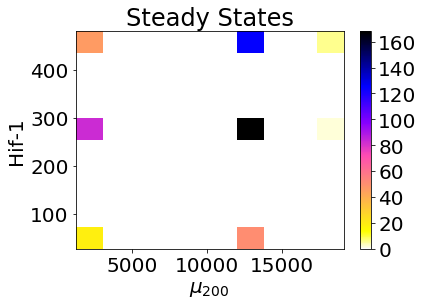

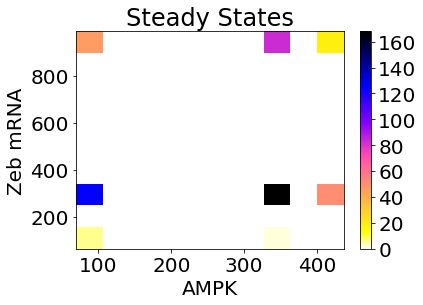

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_3_500_emt.png


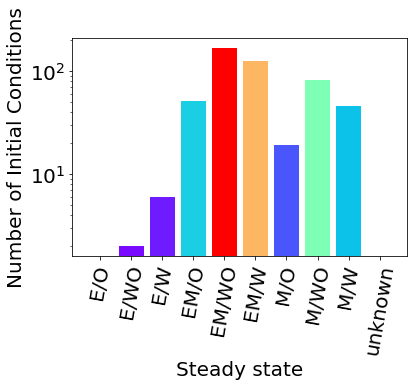

EMT_MR_comp_4_10000_ics.txt
EMT_MR_comp_3_5000_res.txt


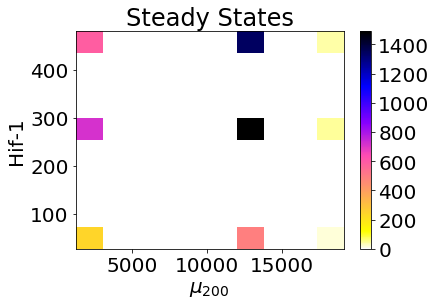

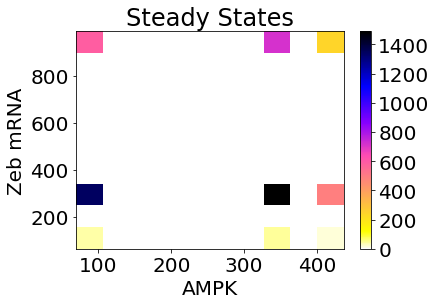

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_3_5000_emt.png


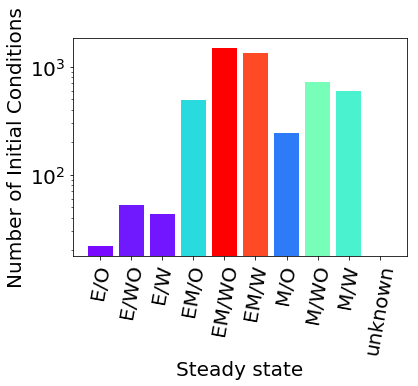

EMT_MR_comp_4_1000_ics.txt
EMT_MR_comp_10_1000_res.txt


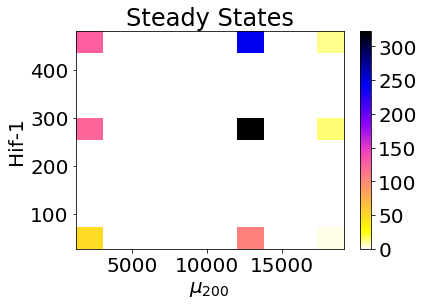

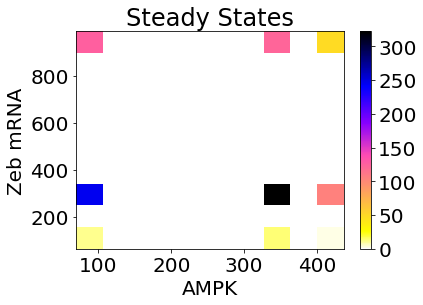

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_10_1000_emt.png


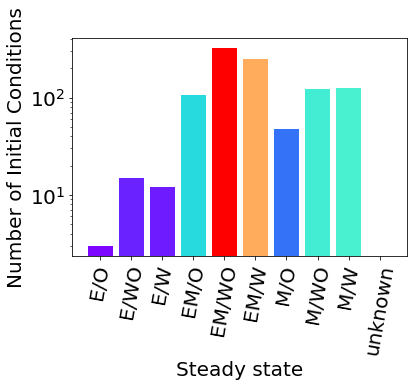

EMT_MR_comp_5_10000_res.txt


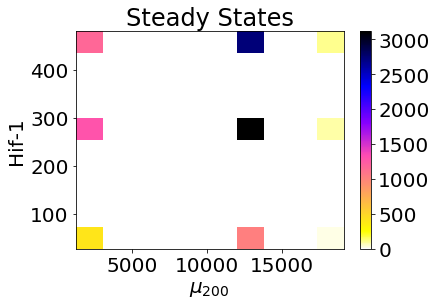

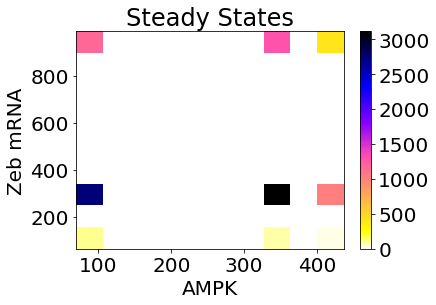

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_5_10000_emt.png


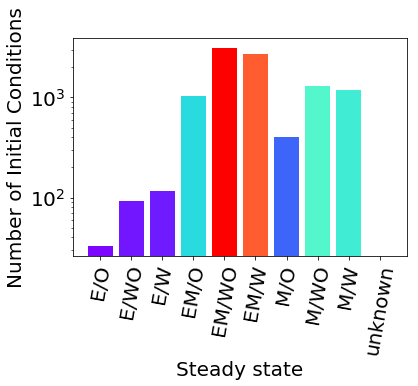

EMT_MR_comp_1_2000_ics.txt
EMT_MR_comp_6_2000_res.txt


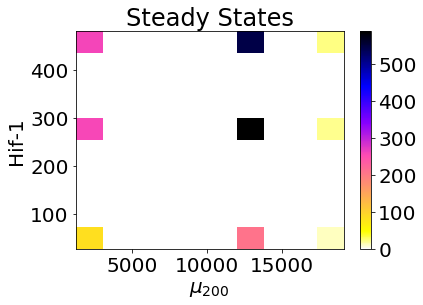

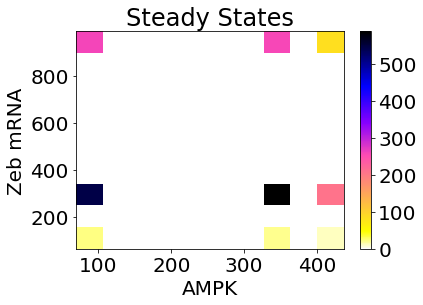

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_6_2000_emt.png


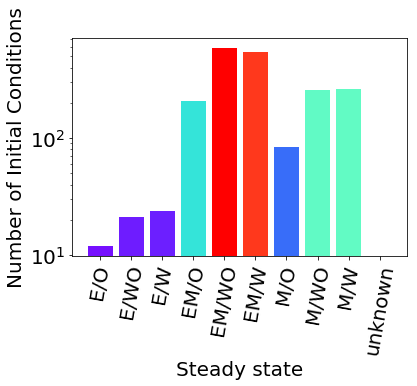

Makefile
EMT_MR_comp_9_100_res.txt


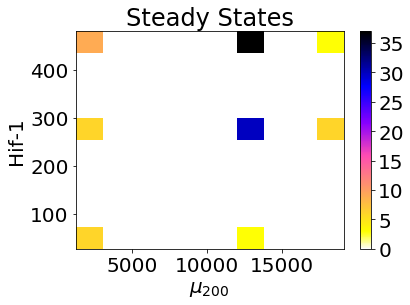

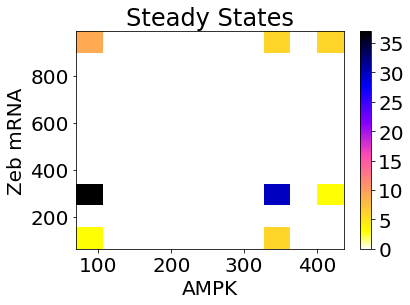

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_9_100_emt.png


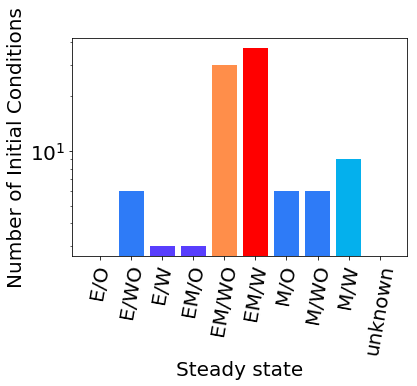

EMT_MR_comp_7_500_res.txt


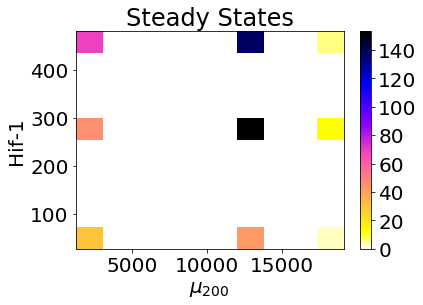

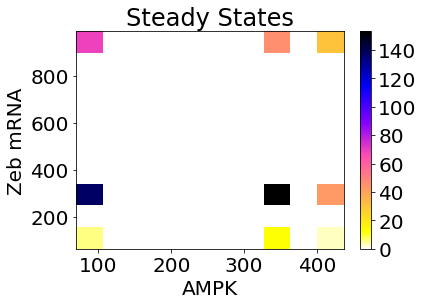

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_7_500_emt.png


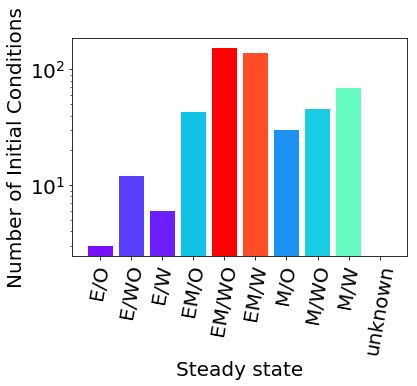

EMT_MR_comp_0_5000_ics.txt
EMT_MR_comp_3_500_ics.txt
EMT_MR_comp_5_100_res.txt


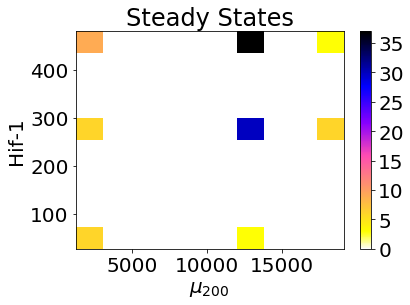

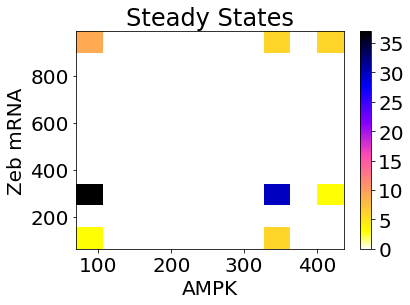

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_5_100_emt.png


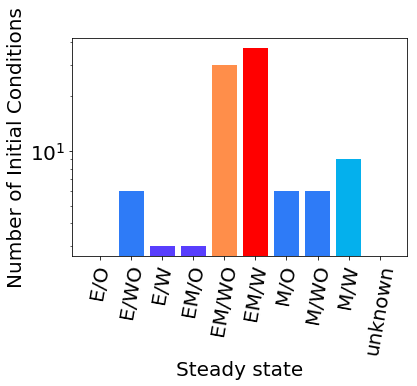

EMT_MR_comp_10_100_res.txt


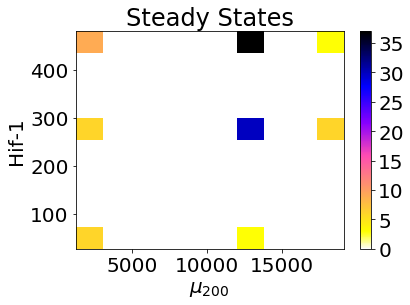

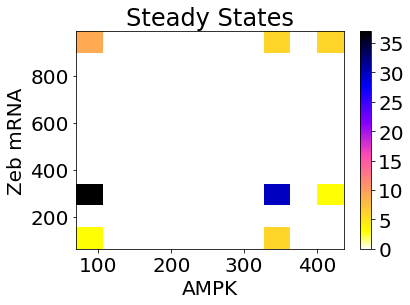

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_10_100_emt.png


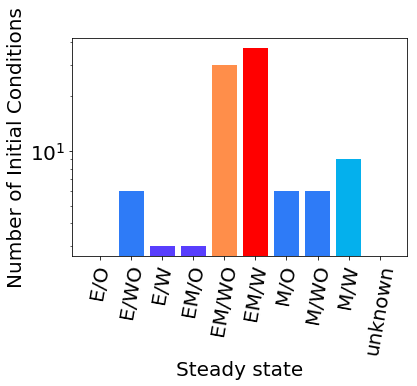

EMT_MR_comp_7_5000_ics.txt
EMT_MR_comp_0_2000_res.txt


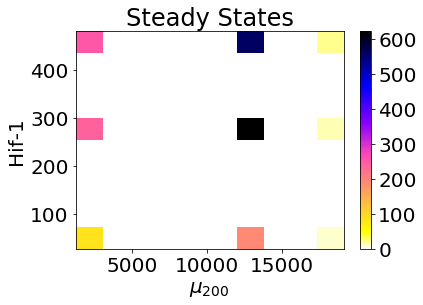

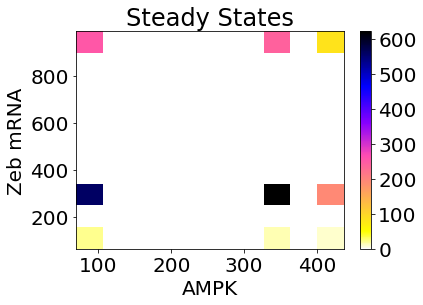

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_2000_emt.png


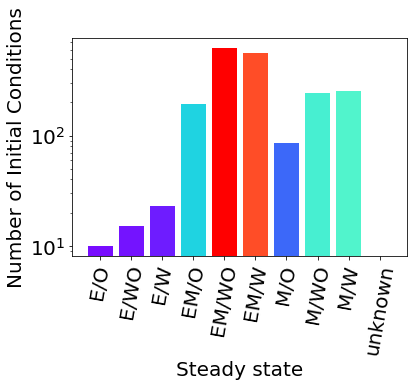

EMT_MR_comp_6_10000_ics.txt
EMT_MR_comp_9_500_res.txt


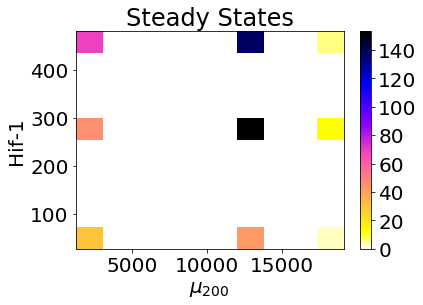

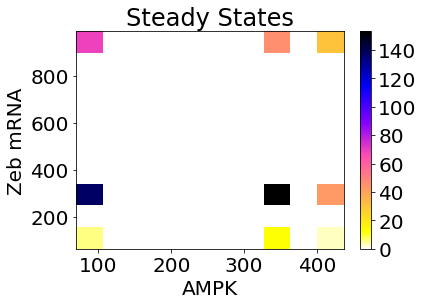

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_9_500_emt.png


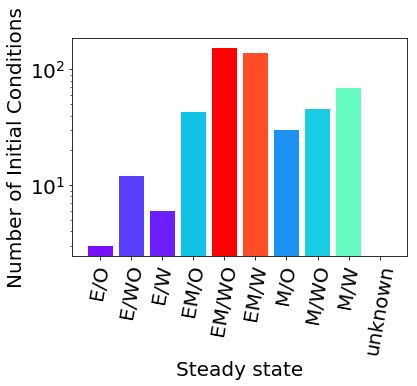

EMT_MR_comp_9_5000_ics.txt
EMT_MR_comp_4_100_ics.txt
EMT_MR_comp_4_5000_res.txt


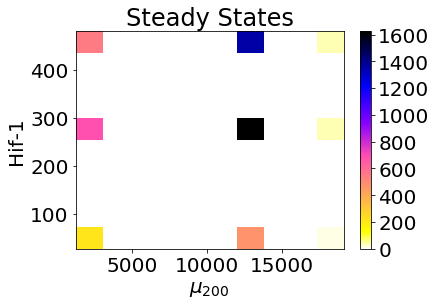

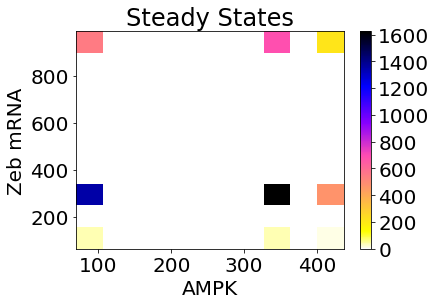

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_4_5000_emt.png


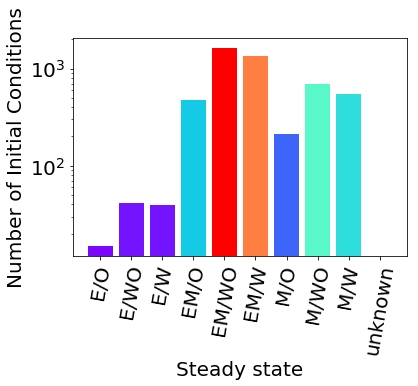

EMT_MR_comp_6_100_res.txt


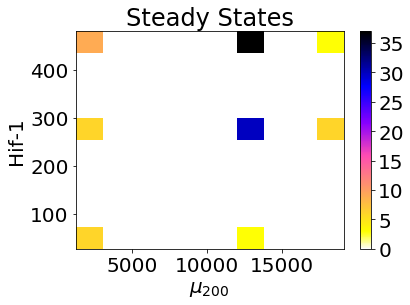

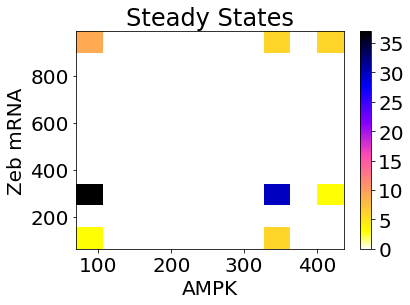

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_6_100_emt.png


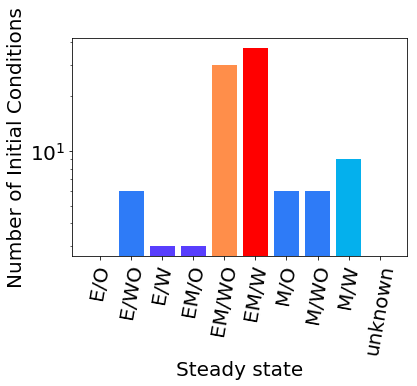

EMT_MR_comp_4_500_ics.txt
EMT_MR_comp_5_10000_ics.txt
EMT_MR_comp_4_1000_res.txt


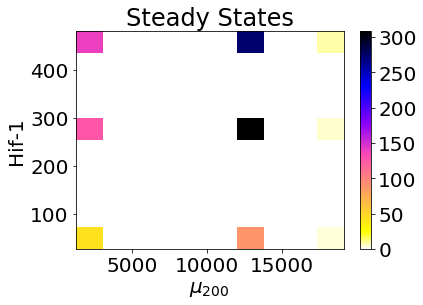

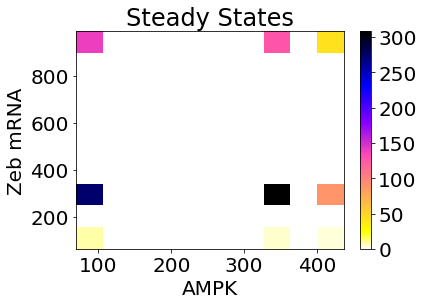

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_4_1000_emt.png


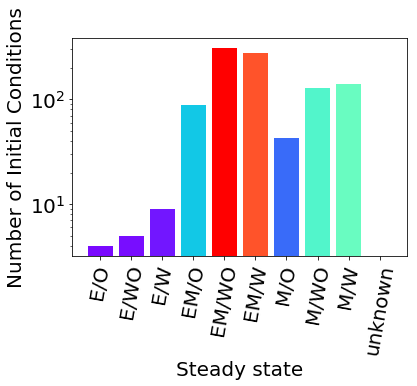

EMT_MR_comp_0_100_res.txt


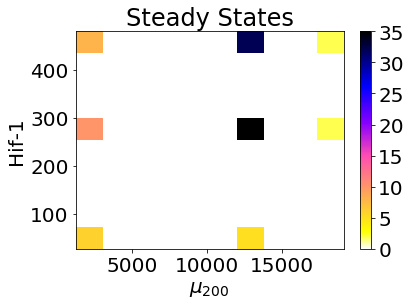

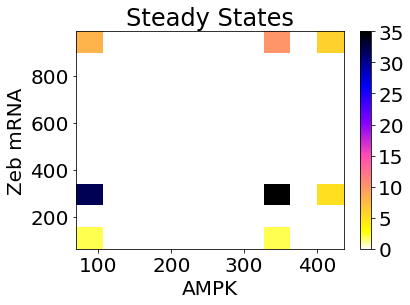

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_100_emt.png


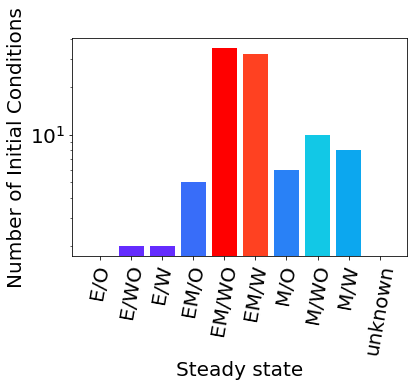

EMT_MR_comp_8_10000_res.txt


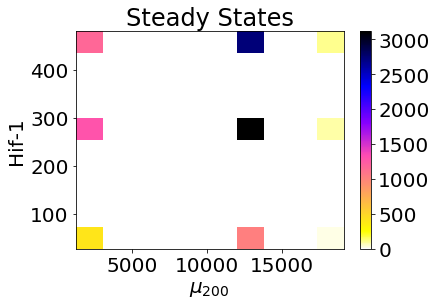

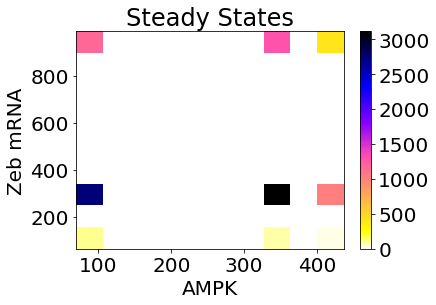

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_8_10000_emt.png


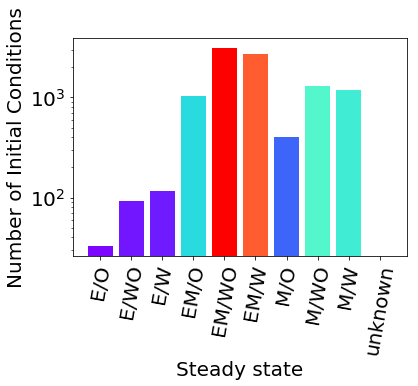

EMT_MR_comp_3_100_res.txt


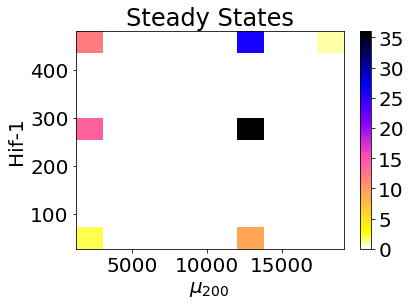

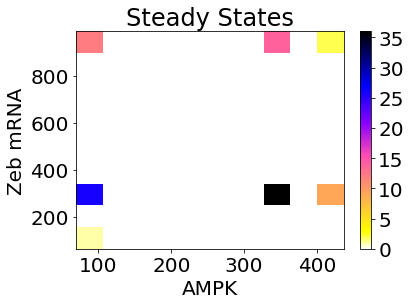

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_3_100_emt.png


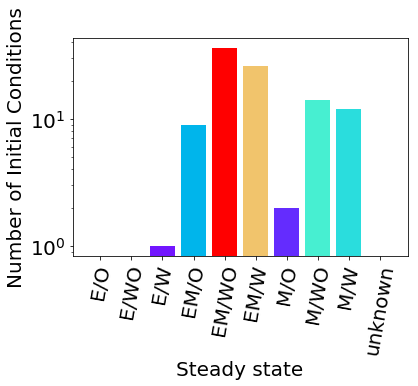

EMT_MR_comp_7_500_ics.txt
EMT_MR_comp_2_100_ics.txt
EMT_MR_comp_0_10000_ics.txt
EMT_MR_comp_2_10000_res.txt


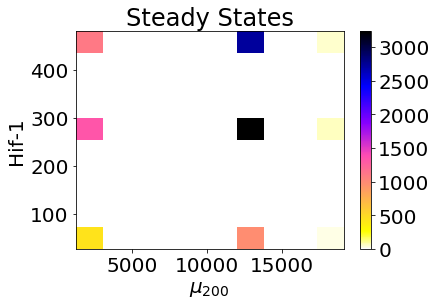

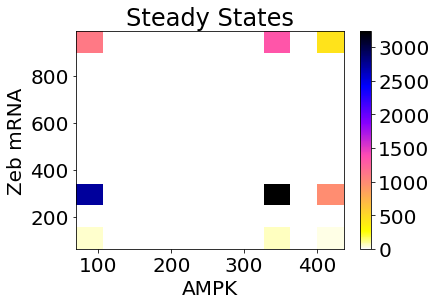

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_2_10000_emt.png


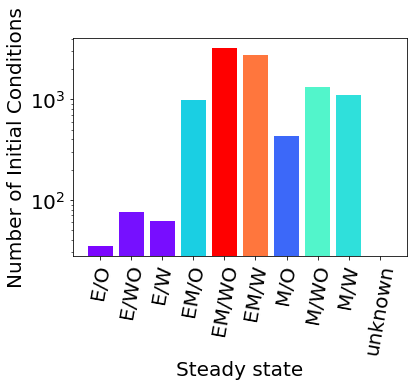

EMT_MR_comp_10_2000_res.txt


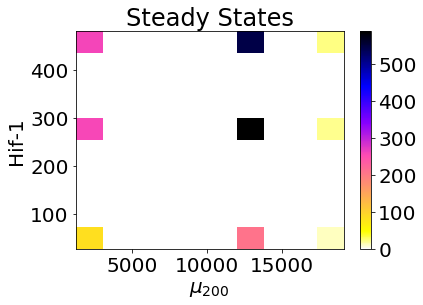

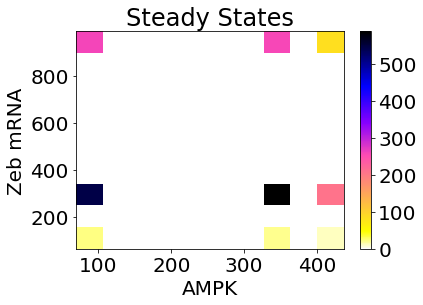

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_10_2000_emt.png


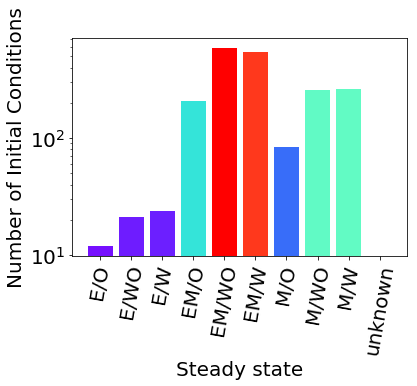

EMT_MR_comp_0_5000_res.txt


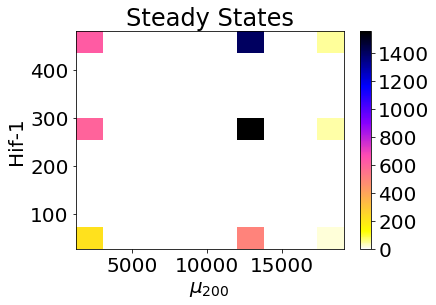

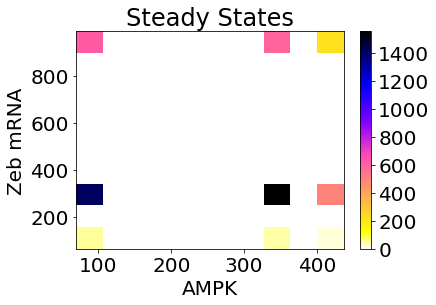

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_5000_emt.png


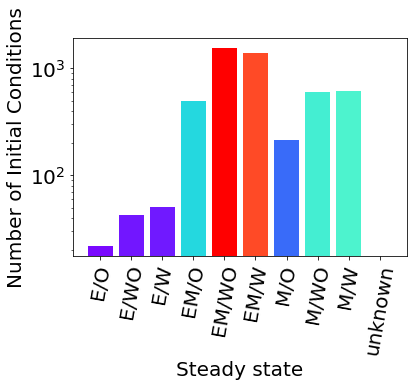

EMT_MR_comp_1_500_res.txt


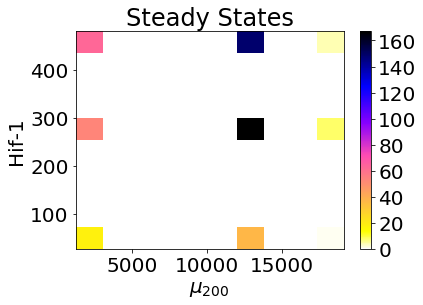

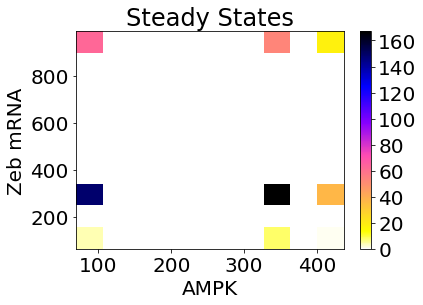

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_1_500_emt.png


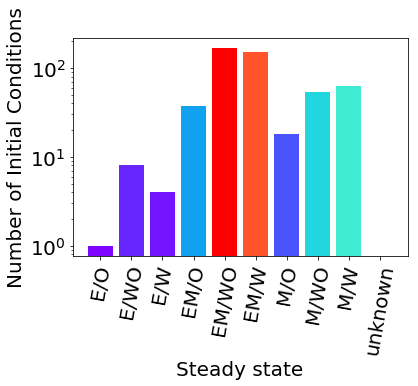

EMT_MR_comp_3_10000_res.txt


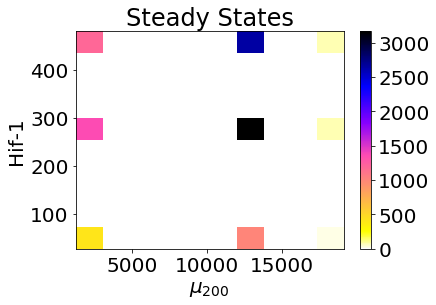

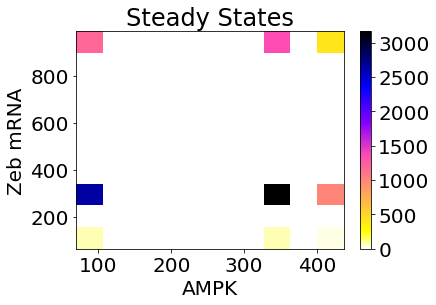

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_3_10000_emt.png


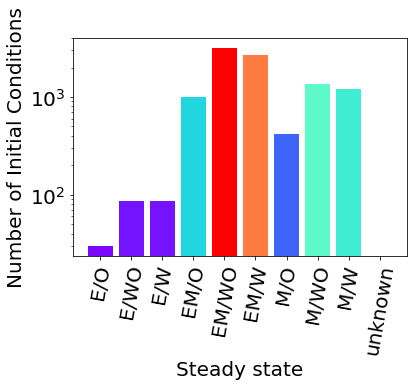

EMT_MR_comp_2_100_res.txt


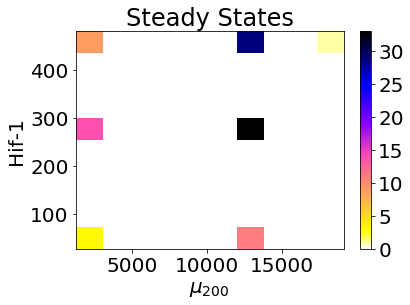

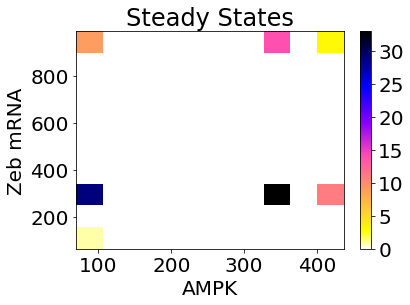

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_2_100_emt.png


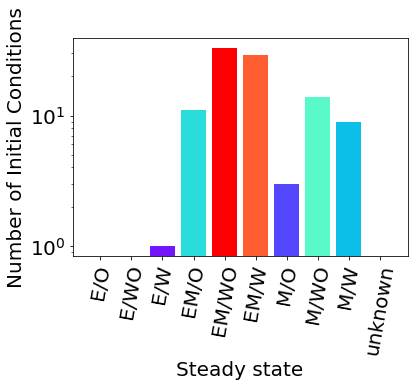

EMT_MR_comp_7_1000_ics.txt
EMT_MR_comp_4_2000_ics.txt
EMT_MR_comp_10_10000_ics.txt
EMT_MR_comp_8_2000_res.txt


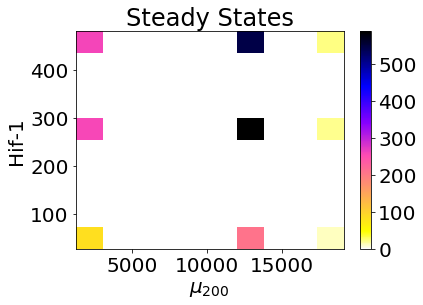

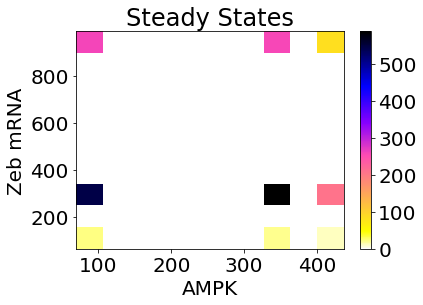

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_8_2000_emt.png


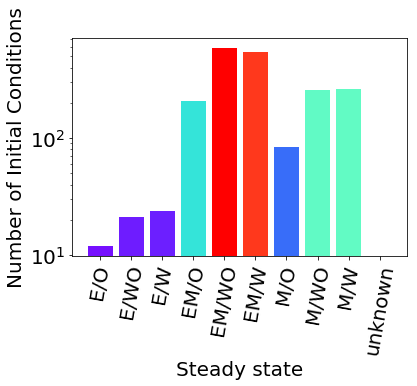

temp.log
EMT_MR_comp_9_2000_ics.txt
EMT_MR_comp_0_10000_res.txt


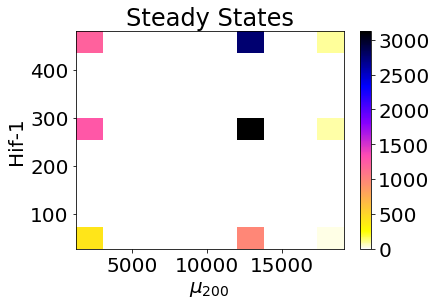

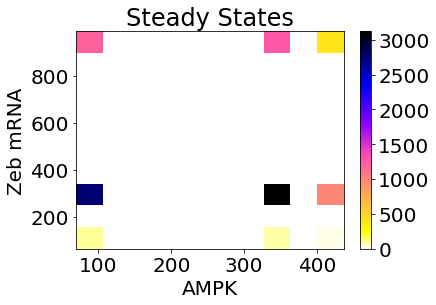

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_10000_emt.png


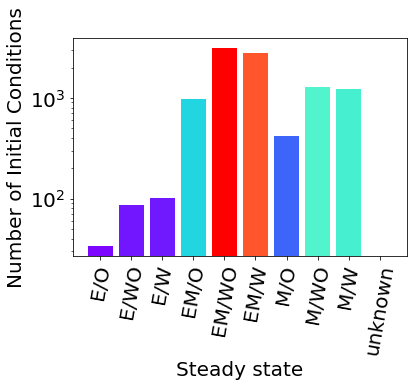

EMT_MR_comp_9_10000_ics.txt
EMT_MR_comp_1_100_ics.txt
EMT_MR_comp_1_2000_res.txt


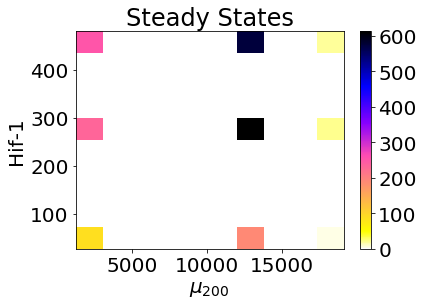

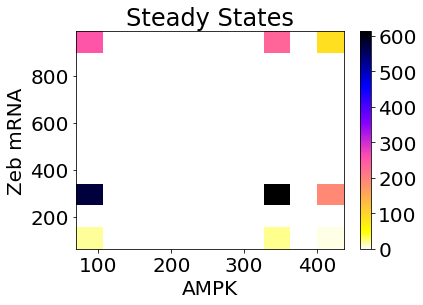

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_1_2000_emt.png


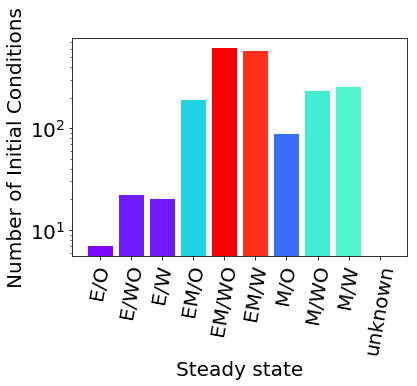

EMT_MR_comp_10_500_ics.txt
res_emtMR
EMT_MR_comp_0_1000_ics.txt
EMT_MR_comp_3_1000_res.txt


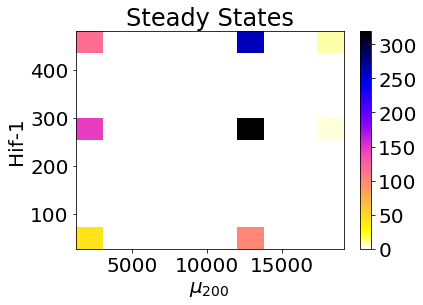

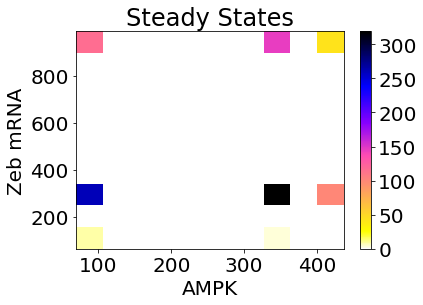

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_3_1000_emt.png


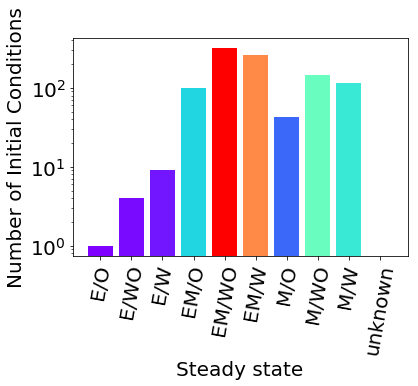

EMT_MR_comp_9_100_ics.txt
EMT_MR_comp_5_1000_ics.txt
README
resCpp.log
EMT_MR_comp_7_100_res.txt


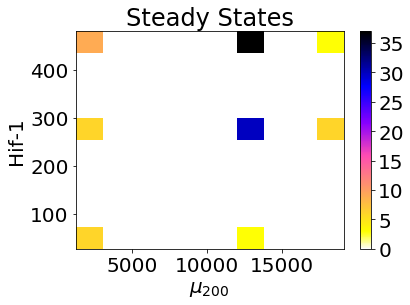

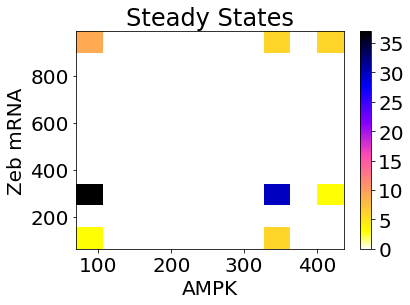

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_7_100_emt.png


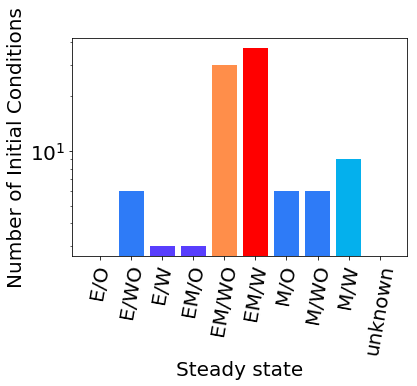

EMT_MR_comp_5_1000_res.txt


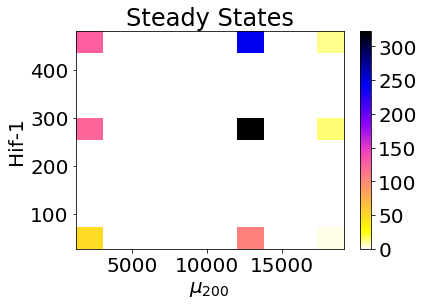

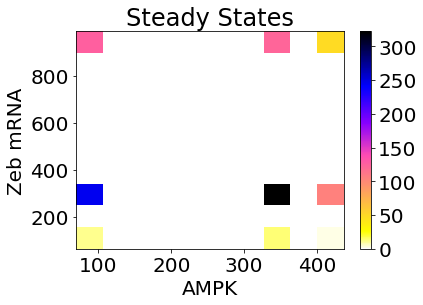

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_5_1000_emt.png


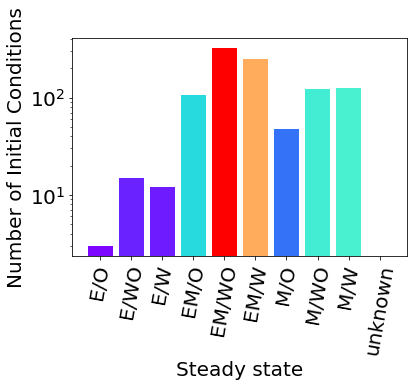

EMT_MR_comp_1_5000_ics.txt
EMT_MR_comp_8_100_res.txt


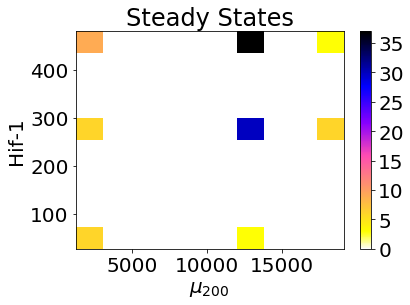

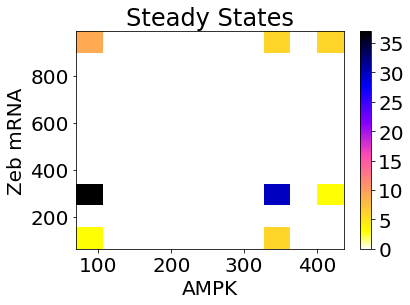

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_8_100_emt.png


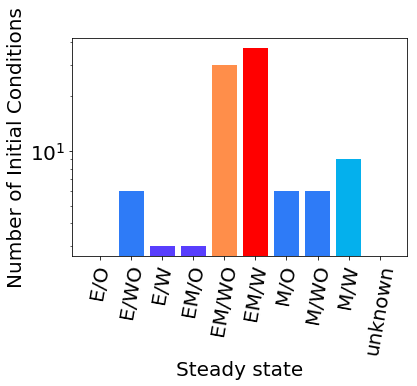

EMT_MR_comp_7_5000_res.txt


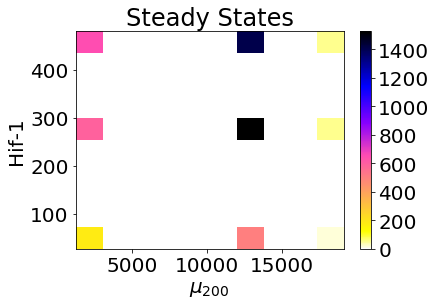

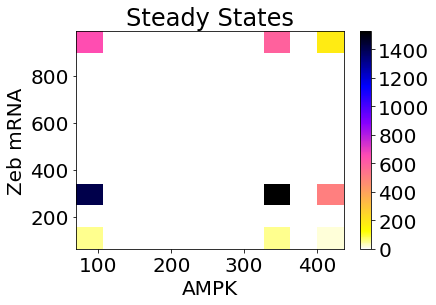

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_7_5000_emt.png


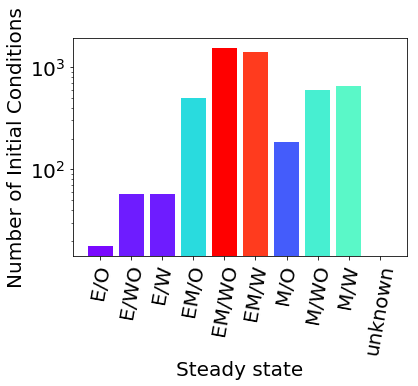

EMT_MR_comp_6_10000_res.txt


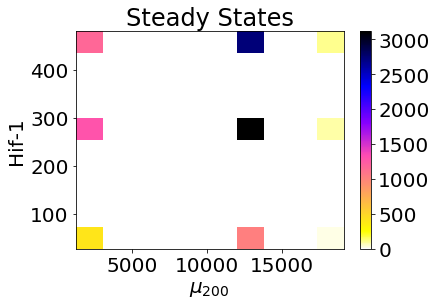

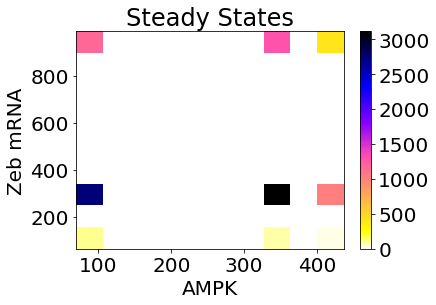

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_6_10000_emt.png


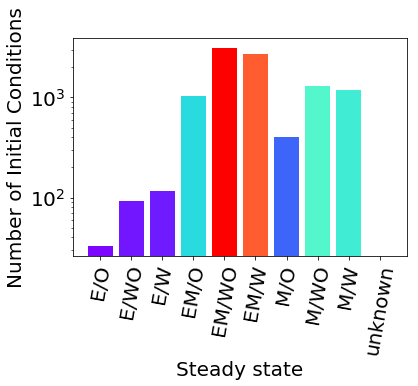

EMT_MR_comp_10_5000_res.txt


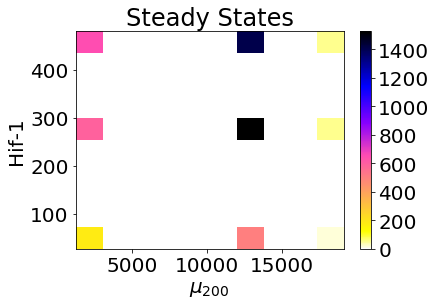

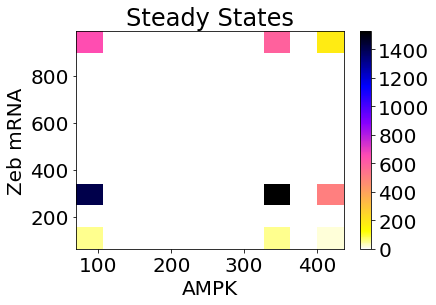

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_10_5000_emt.png


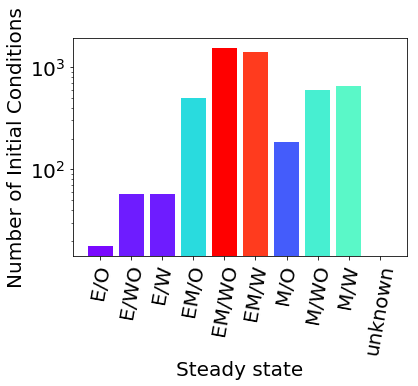

EMT_MR_comp_3_100_ics.txt
EMT_MR_comp_8_1000_ics.txt
EMT_MR_comp_1_1000_ics.txt
EMT_MR_comp_4_500_res.txt


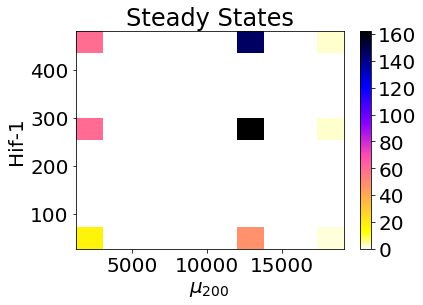

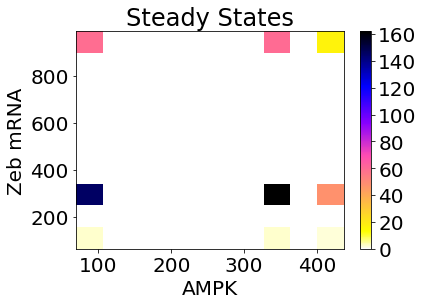

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_4_500_emt.png


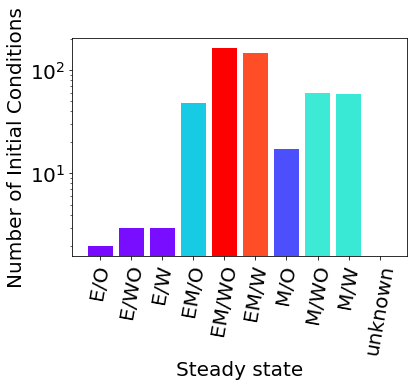

EMT_MR_comp_9_2000_res.txt


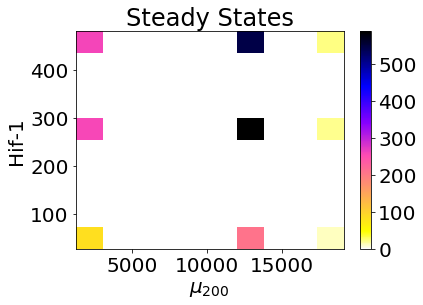

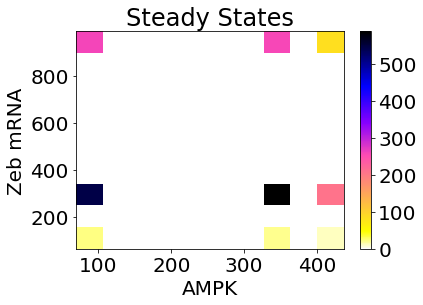

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_9_2000_emt.png


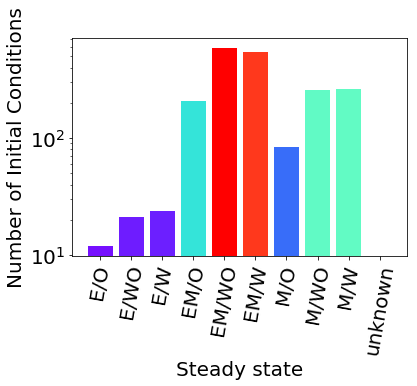

EMT_MR_comp_9_10000_res.txt


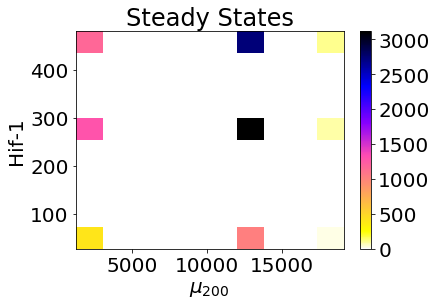

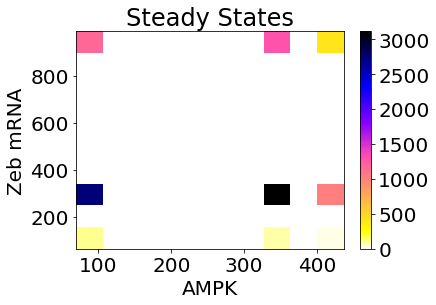

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_9_10000_emt.png


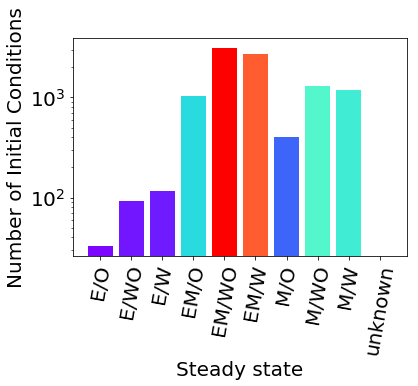

EMT_MR_comp_2_2000_ics.txt
EMT_MR_comp_4_100_res.txt


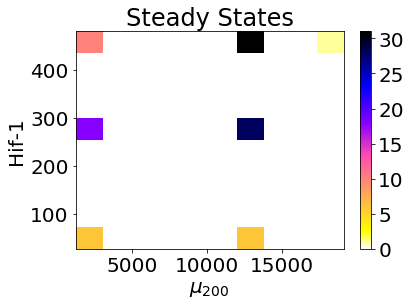

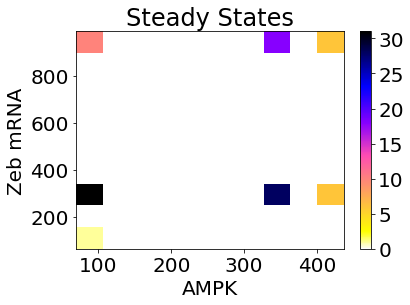

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_4_100_emt.png


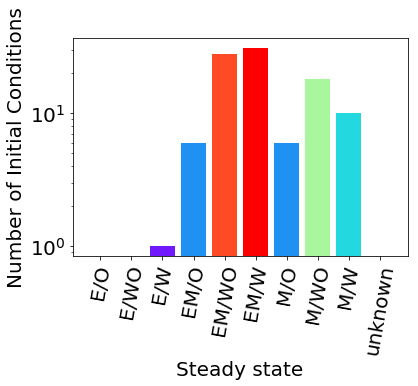

EMT_MR_comp_8_500_res.txt


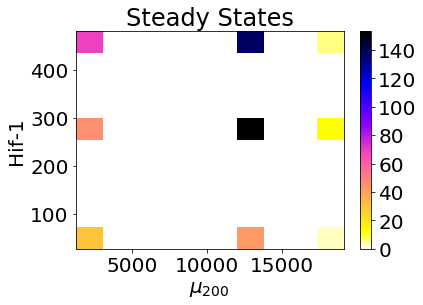

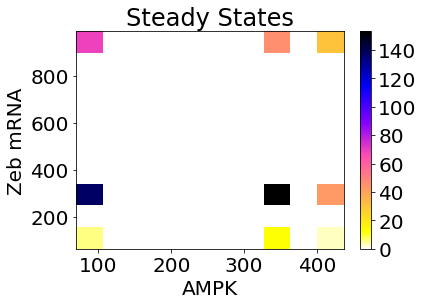

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_8_500_emt.png


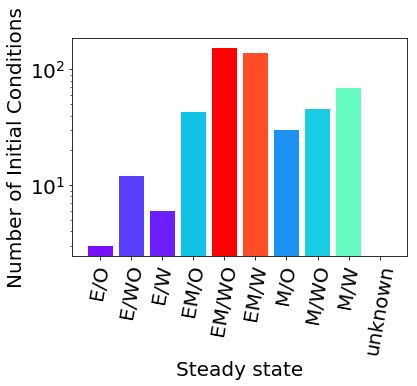

EMT_MR_comp_1_10000_res.txt


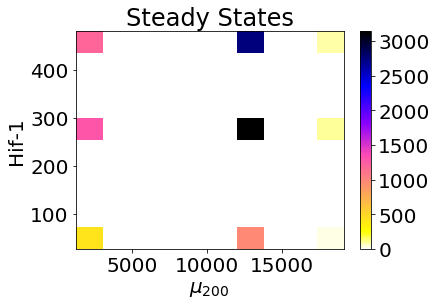

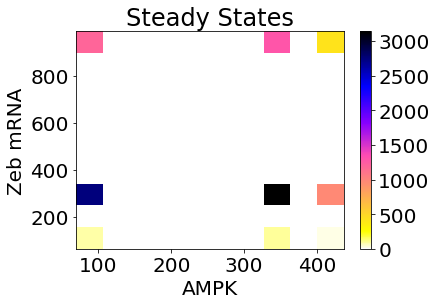

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_1_10000_emt.png


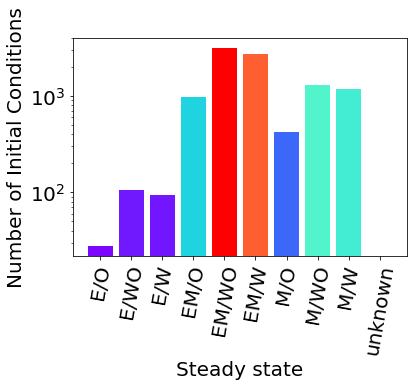

EMT_MR_comp_1_500_ics.txt
EMT_MR_comp_6_100_ics.txt
EMT_MR_comp_7_10000_ics.txt
EMT_MR_comp_3_1000_ics.txt
EMT_MR_comp_8_5000_ics.txt
EMT_MR_comp_5_5000_res.txt


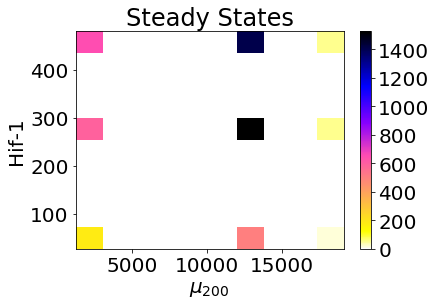

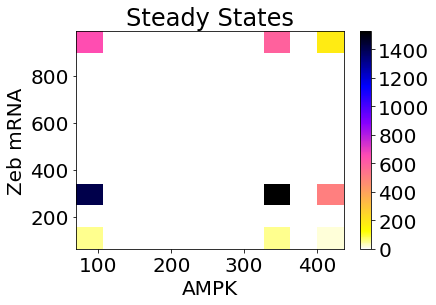

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_5_5000_emt.png


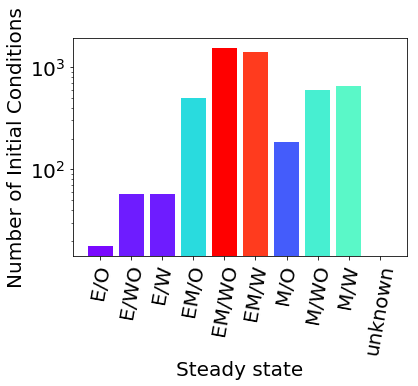

EMT_MR_comp_0_500_res.txt


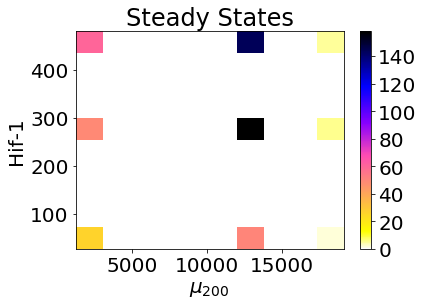

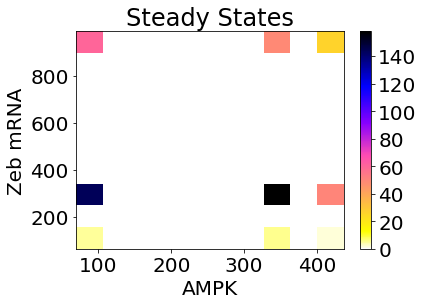

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_500_emt.png


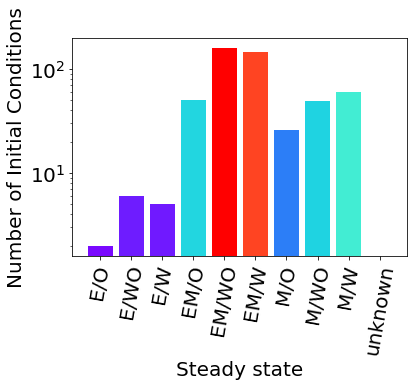

EMT_MR_comp_0_1000_res.txt


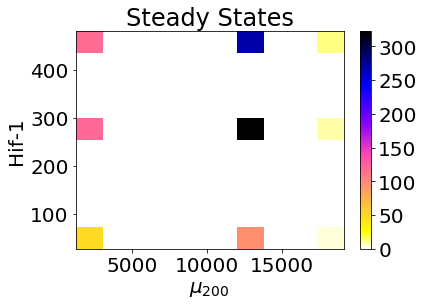

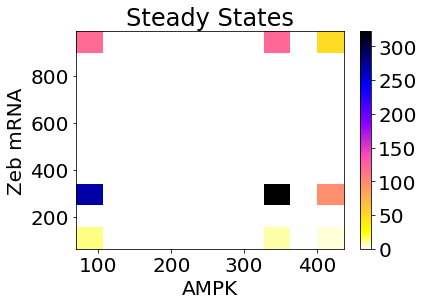

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_emt.png


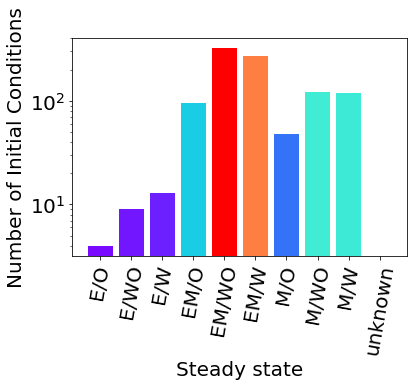

EMT_MR_comp_6_1000_ics.txt
EMT_MR_comp_3_2000_ics.txt
EMT_MR_comp_3_2000_res.txt


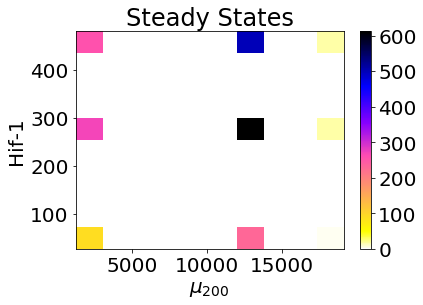

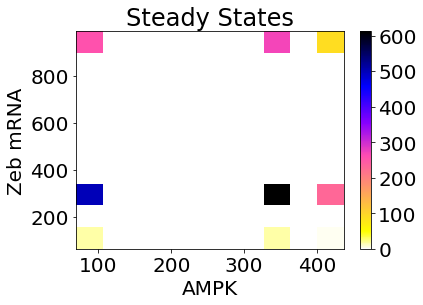

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_3_2000_emt.png


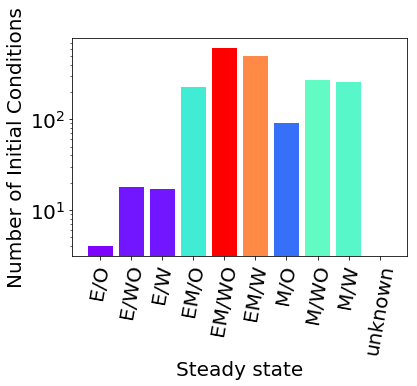

EMT_MR_comp_3_10000_ics.txt
EMT_MR_comp_1_1000_res.txt


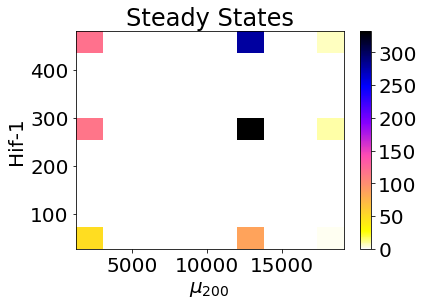

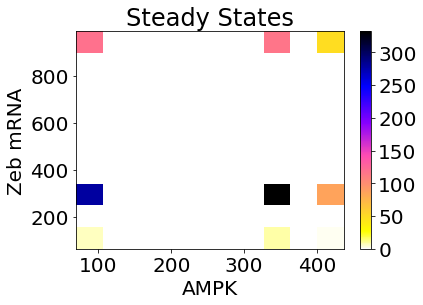

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_1_1000_emt.png


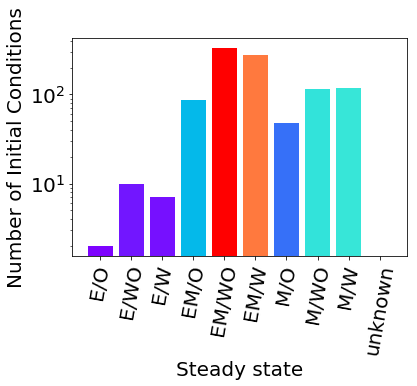

EMT_MR_comp_5_500_ics.txt
EMT_MR_comp_1_100_res.txt


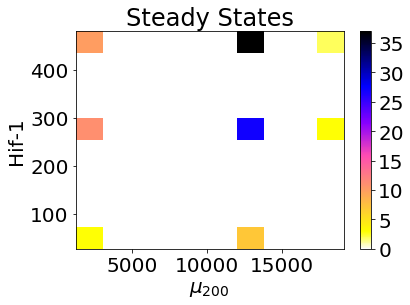

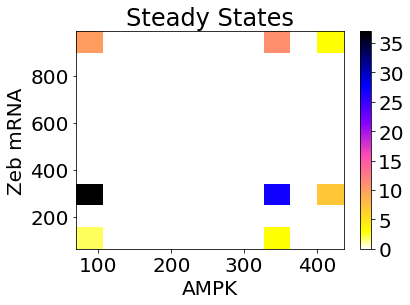

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_1_100_emt.png


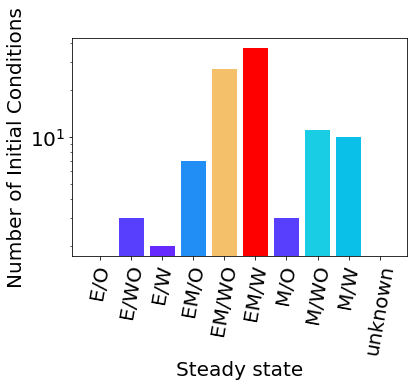

EMT_MR_comp_9_1000_ics.txt
EMT_MR_comp_2_2000_res.txt


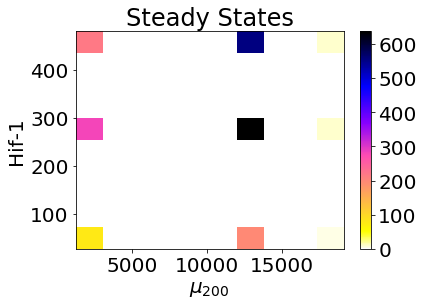

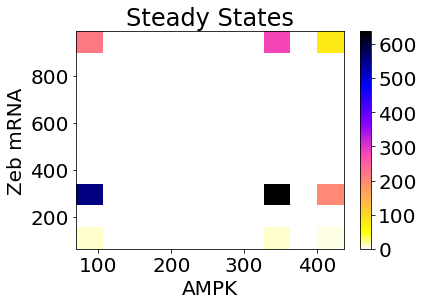

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_2_2000_emt.png


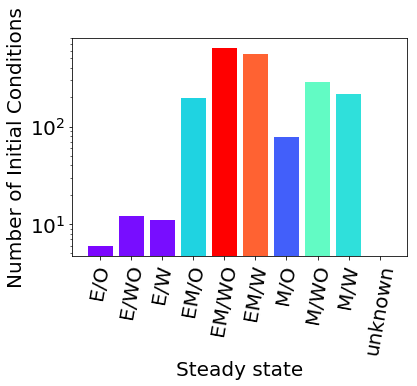

EMT_MR_comp_9_1000_res.txt


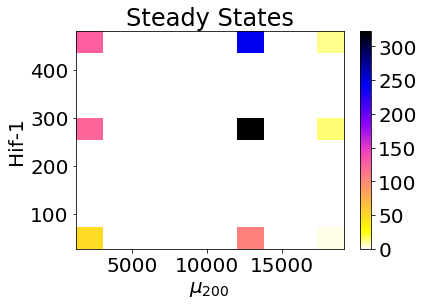

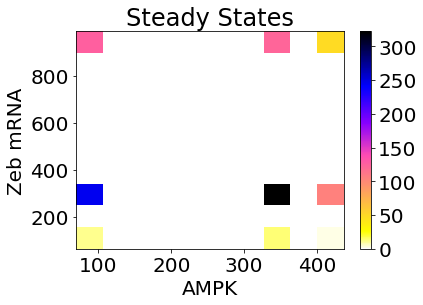

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_9_1000_emt.png


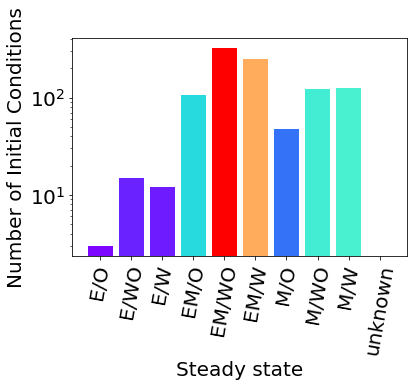

EMT_MR_comp_10_100_ics.txt
res_emt_mrH.cpp
EMT_MR_comp_3_5000_ics.txt
EMT_MR_comp_2_5000_ics.txt
EMT_MR_comp_8_2000_ics.txt
EMT_MR_comp_0_100_ics.txt
EMT_MR_comp_7_10000_res.txt


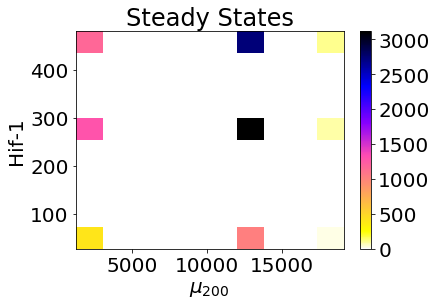

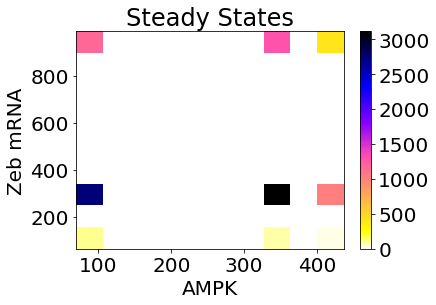

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_7_10000_emt.png


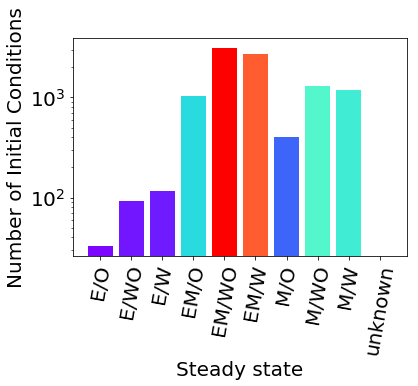

EMT_MR_comp_2_1000_ics.txt
EMT_MR_comp_8_10000_ics.txt
EMT_MR_comp_6_500_ics.txt
EMT_MR_comp_10_10000_res.txt


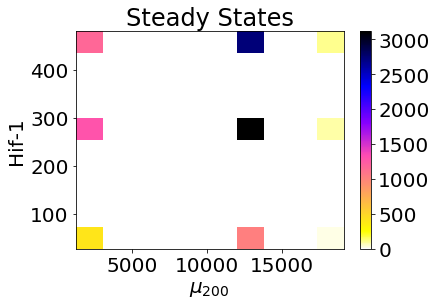

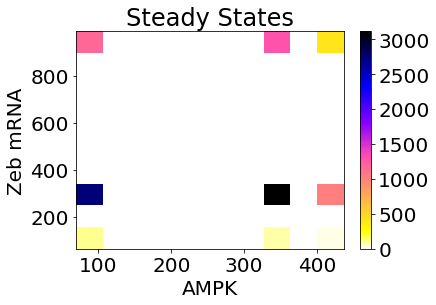

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_10_10000_emt.png


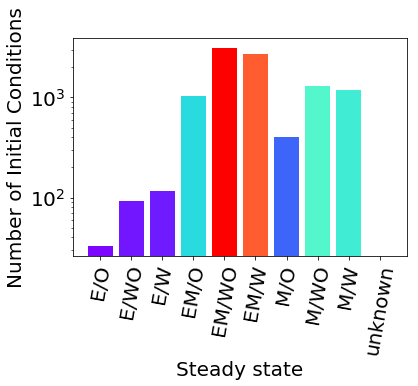

EMT_MR_comp_8_1000_res.txt


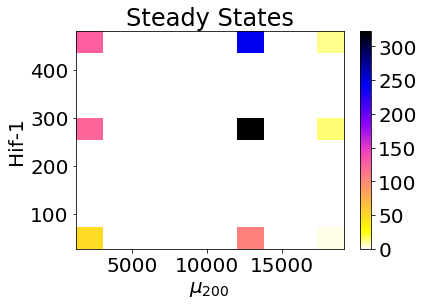

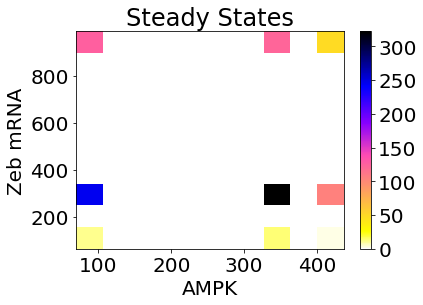

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_8_1000_emt.png


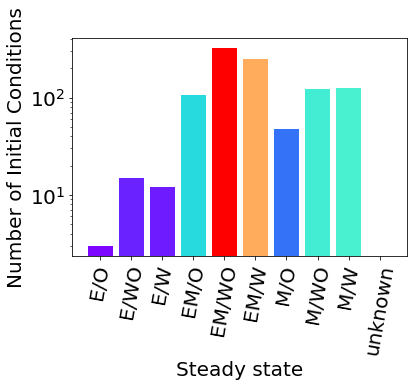

EMT_MR_comp_7_100_ics.txt
EMT_MR_comp_6_2000_ics.txt
EMT_MR_comp_5_2000_ics.txt
EMT_MR_comp_6_1000_res.txt


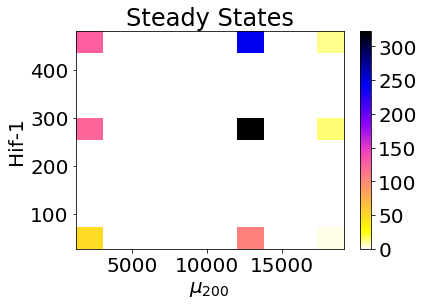

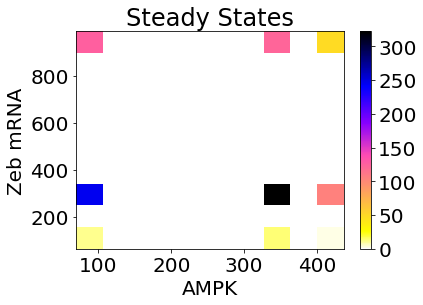

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_6_1000_emt.png


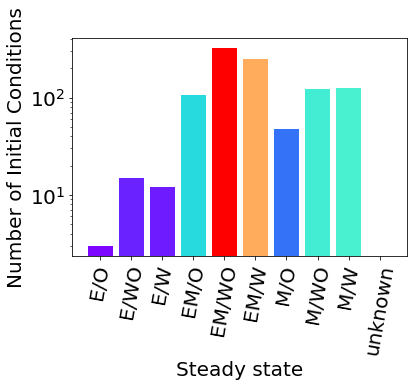

EMT_MR_comp_7_2000_res.txt


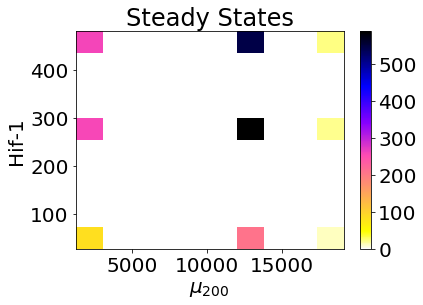

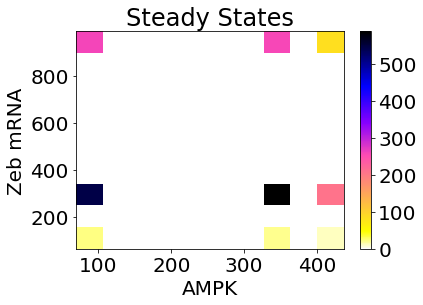

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_7_2000_emt.png


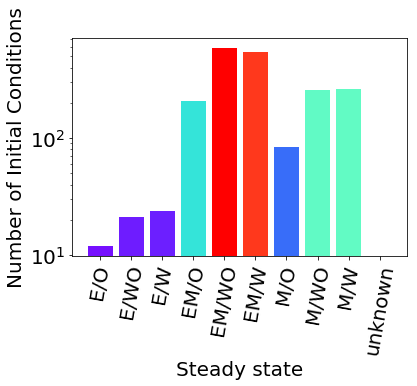

EMT_MR_comp_4_5000_ics.txt
EMT_MR_comp_2_5000_res.txt


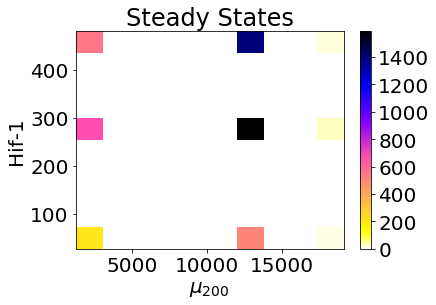

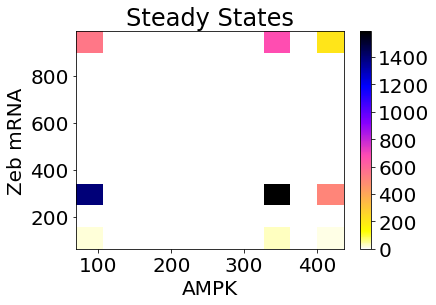

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_2_5000_emt.png


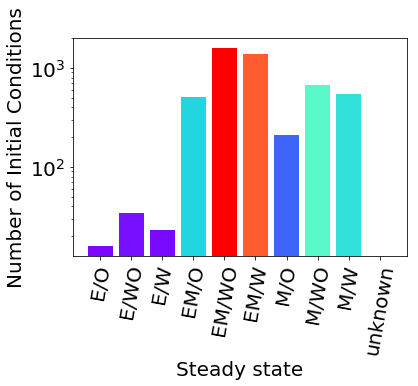

EMT_MR_comp_9_500_ics.txt
EMT_MR_comp_6_5000_res.txt


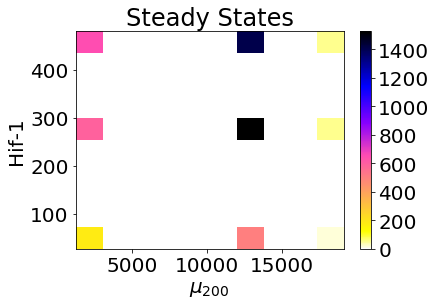

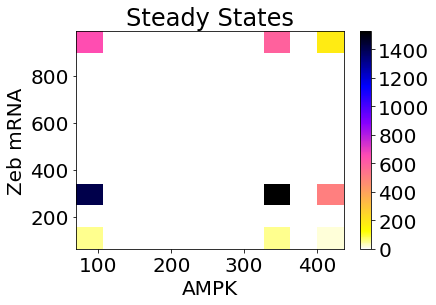

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_6_5000_emt.png


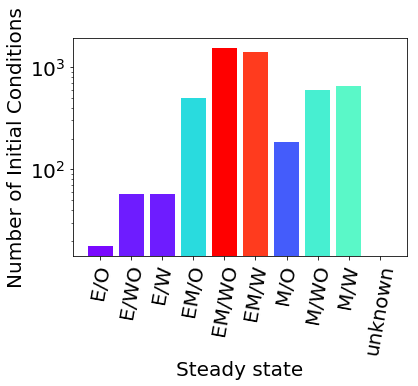

EMT_MR_comp_5_2000_res.txt


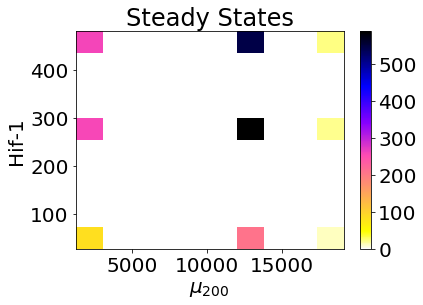

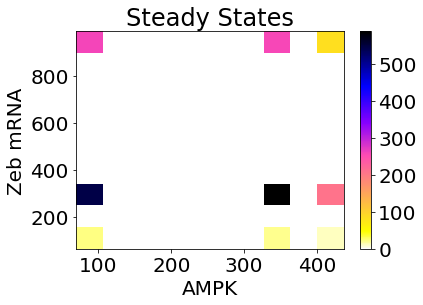

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_5_2000_emt.png


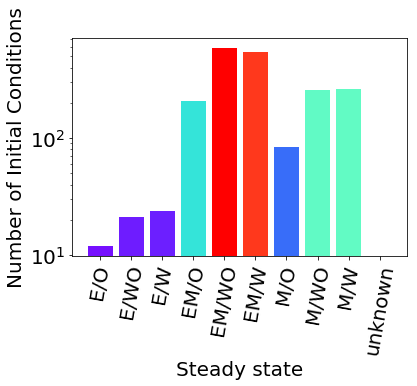

EMT_MR_comp_4_2000_res.txt


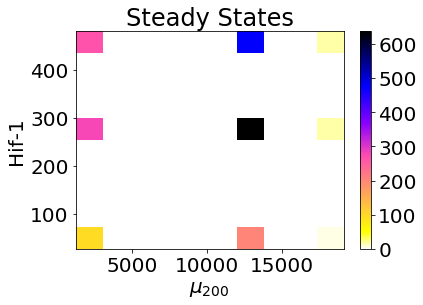

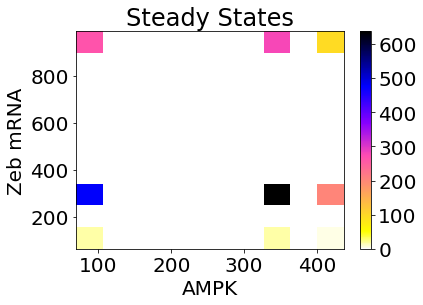

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_4_2000_emt.png


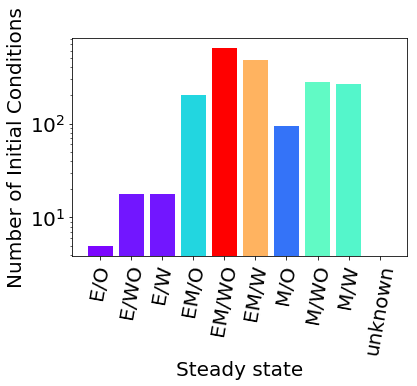

EMT_MR_comp_8_500_ics.txt
EMT_MR_comp_0_500_ics.txt
EMT_MR_comp_6_500_res.txt


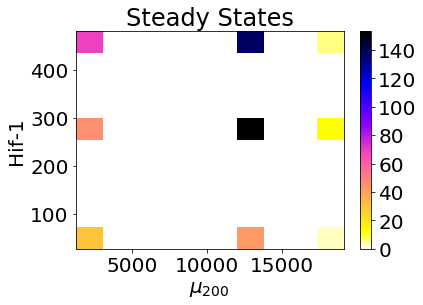

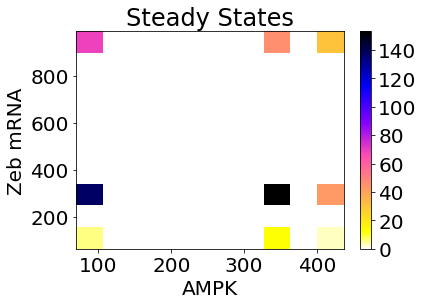

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_6_500_emt.png


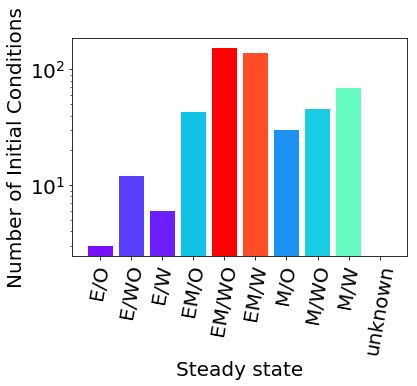

EMT_MR_comp_5_100_ics.txt
EMT_MR_comp_8_100_ics.txt
EMT_MR_comp_5_5000_ics.txt
EMT_MR_comp_2_10000_ics.txt
EMT_MR_comp_2_500_res.txt


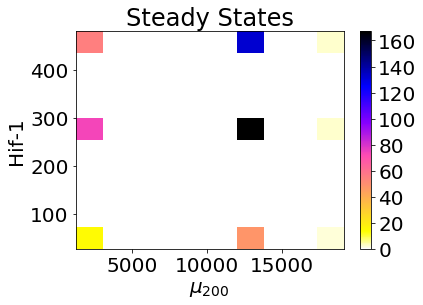

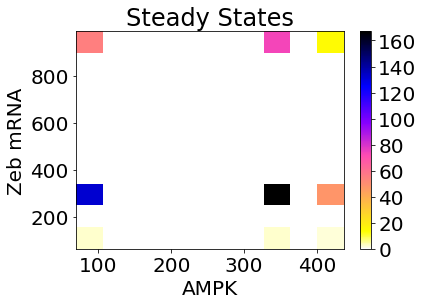

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_2_500_emt.png


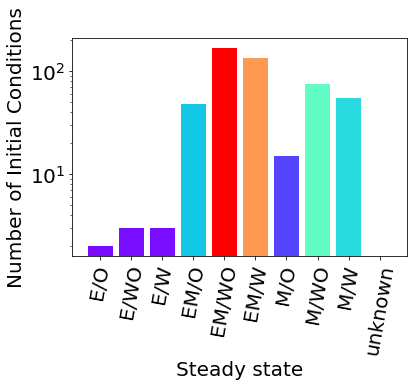

EMT_MR_comp_2_500_ics.txt
EMT_MR_comp_2_1000_res.txt


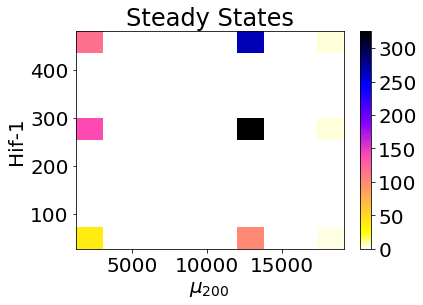

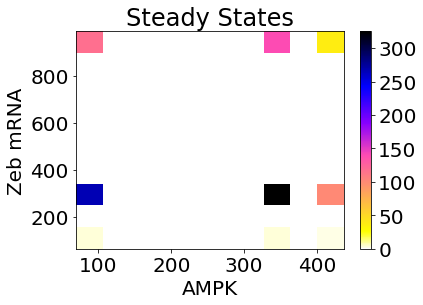

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_2_1000_emt.png


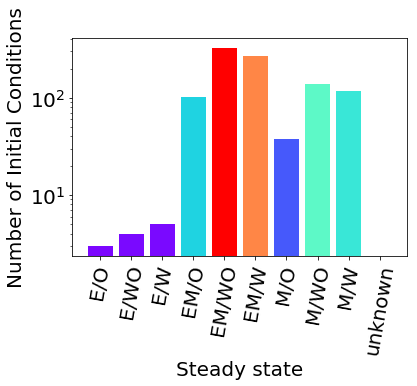

EMT_MR_comp_0_2000_ics.txt
EMT_MR_comp_8_5000_res.txt


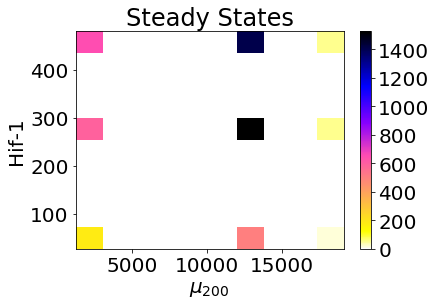

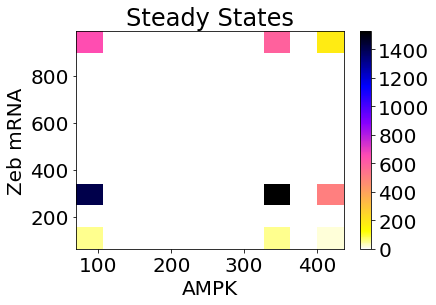

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_8_5000_emt.png


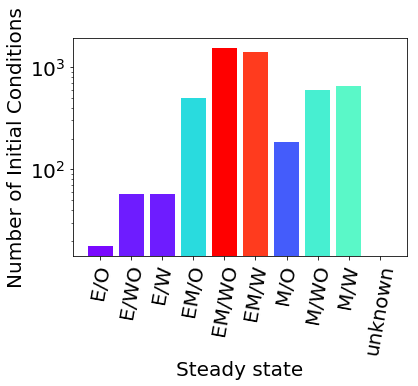

EMT_MR_comp_6_5000_ics.txt
EMT_MR_comp_7_1000_res.txt


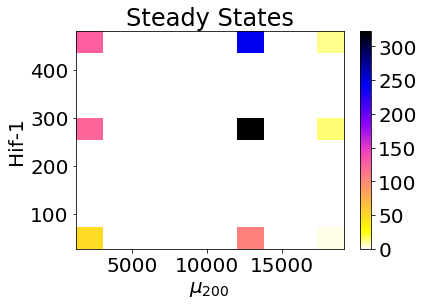

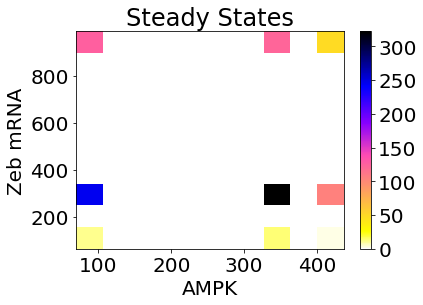

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_7_1000_emt.png


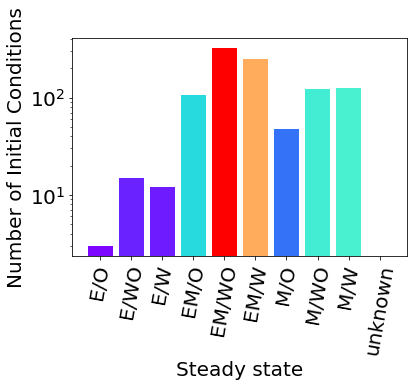

EMT_MR_comp_4_10000_res.txt


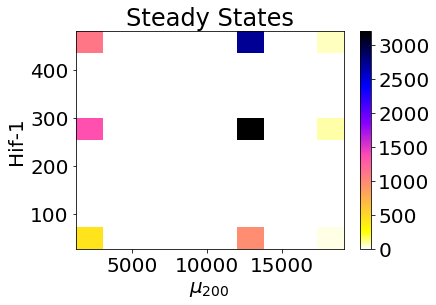

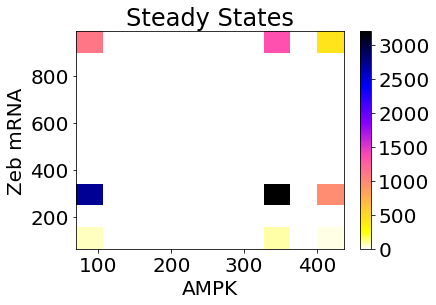

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_4_10000_emt.png


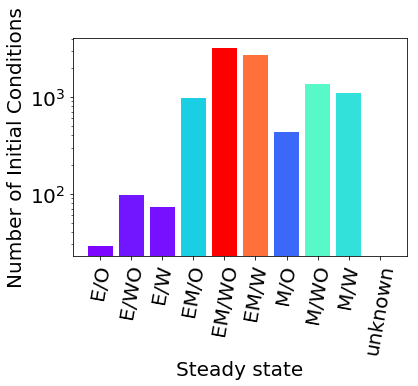

EMT_MR_comp_1_5000_res.txt


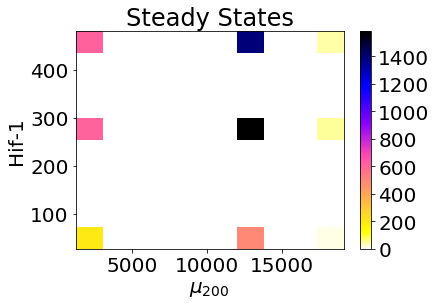

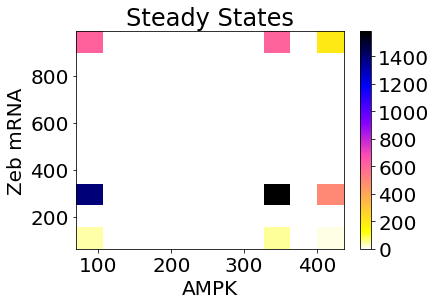

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_1_5000_emt.png


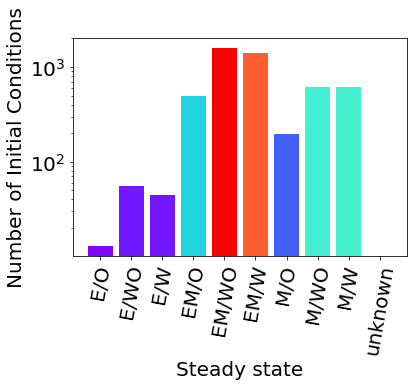

EMT_MR_comp_10_2000_ics.txt
EMT_MR_comp_10_1000_ics.txt
seedsForSims.txt
EMT_MR_comp_5_500_res.txt


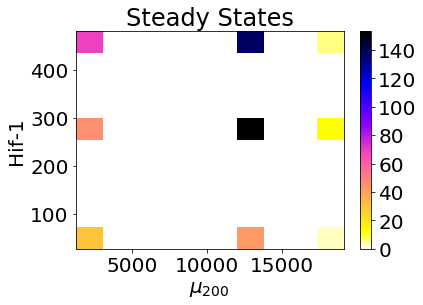

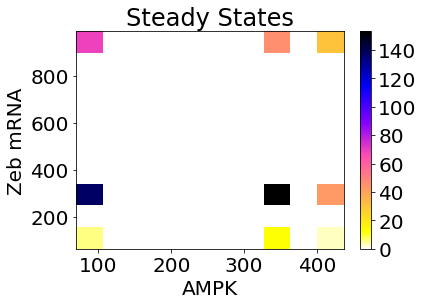

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_5_500_emt.png


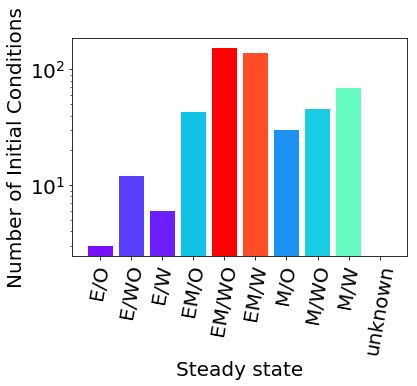

EMT_MR_comp_10_500_res.txt


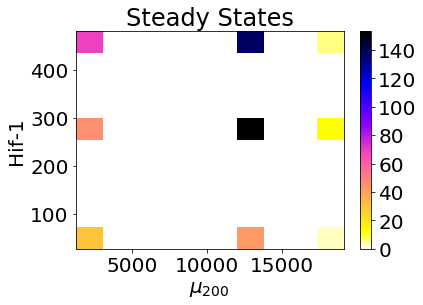

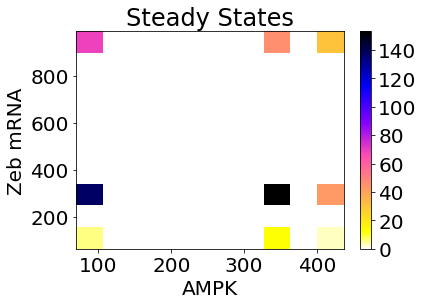

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_10_500_emt.png


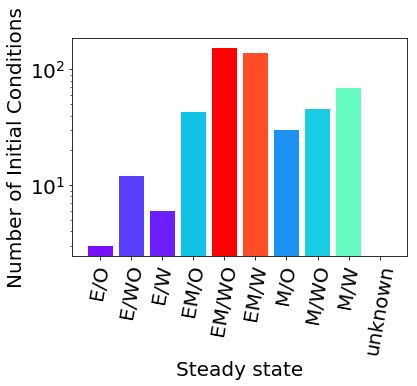

EMT_MR_comp_7_2000_ics.txt
EMT_MR_comp_10_5000_ics.txt
EMT_MR_comp_1_10000_ics.txt
EMT_MR_comp_9_5000_res.txt


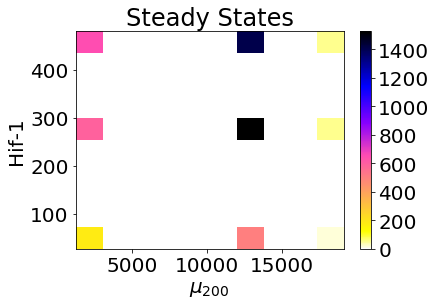

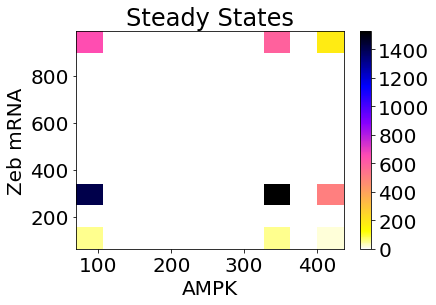

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_9_5000_emt.png


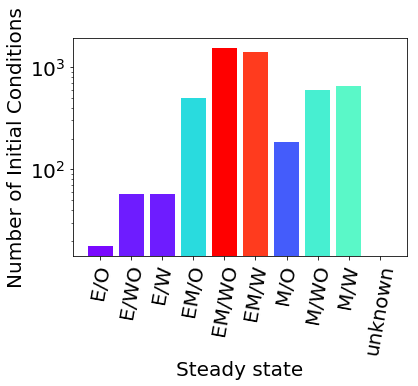

In [46]:
direct = "coupledWReg_Ccode/crosstalk_comparison/"
regs={}
for filen in os.listdir(direct):
    print filen
    if "res.txt" in filen:
        plotRes(direct+filen)
        amount= filen.split(".")[0].split("_")[4]

        if amount not in regs.keys():
            regs[amount]=[]
        regs[amount]+=[filen]


In [49]:
def plotCompAll(regs):

    results={'E/O':[[],[],[]],'E/W':[[],[],[]],'E/WO':[[],[],[]],'EM/O':[[],[],[]],'EM/W':[[],[],[]],'EM/WO':[[],[],[]],'M/O':[[],[],[]],'M/W':[[],[],[]],'M/WO':[[],[],[]],'unknown':[[],[],[]]}
    resultsSum={'E':[[],[],[]],'EM':[[],[],[]],'M':[[],[],[]],'O':[[],[],[]],'WO':[[],[],[]],'W':[[],[],[]],'unknown':[[],[],[]]}
    for name in regs:
        tmpE={'E/O':[],'E/W':[],'E/WO':[],'EM/O':[],'EM/W':[],'EM/WO':[],'M/O':[],'M/W':[],'M/WO':[],'unknown':[]}
        tmpS={'E':[],'EM':[],'M':[],'O':[],'WO':[],'W':[],'unknown':[]}
        for sim in range(len(regs[name])):

            df = pd.read_csv("coupledWReg_Ccode/crosstalk_comparison/"+regs[name][sim]).dropna()

            mapResE,resSum,maxC =getStates_fromMap(df,hold=True)
            for k in range(len(mapResE['name'])):
                tmp = mapResE['name'][k]
                if sim==0:
                    results[tmp][0]+=[int(name)]
                    tmpE[tmp] += [mapResE['amount'][k]/float(name)*100.]
                else:
                    tmpE[tmp] += [mapResE['amount'][k]/float(name)*100.]
            for k in range(len(resSum['name'])):
                tmp = resSum['name'][k]
                if sim==0:
                    resultsSum[tmp][0]+=[int(name)]
                    tmpS[tmp] += [resSum['amount'][k]/float(name)*100.]
                else:
                    tmpS[tmp] += [resSum['amount'][k]/float(name)*100.]



        for k in results:
            results[k][1]+= [np.mean(tmpE[k])]
            results[k][2]+= [np.std(tmpE[k])]

        for k in resultsSum:
            resultsSum[k][1]+= [np.mean(tmpS[k])]
            resultsSum[k][2]+= [np.std(tmpS[k])]
        

    for k in results:
        ind = np.argsort(results[k][0])
        results[k][0] = np.array(results[k][0])[ind]
        results[k][1] = np.array(results[k][1])[ind]
        results[k][2] = np.array(results[k][2])[ind]
    for k in resultsSum:
        ind = np.argsort(resultsSum[k][0])
        resultsSum[k][0] = np.array(resultsSum[k][0])[ind]
        resultsSum[k][1] = np.array(resultsSum[k][1])[ind]
        resultsSum[k][2] = np.array(resultsSum[k][2])[ind]

    plotCoupled(results)
    plotStateSum(resultsSum)


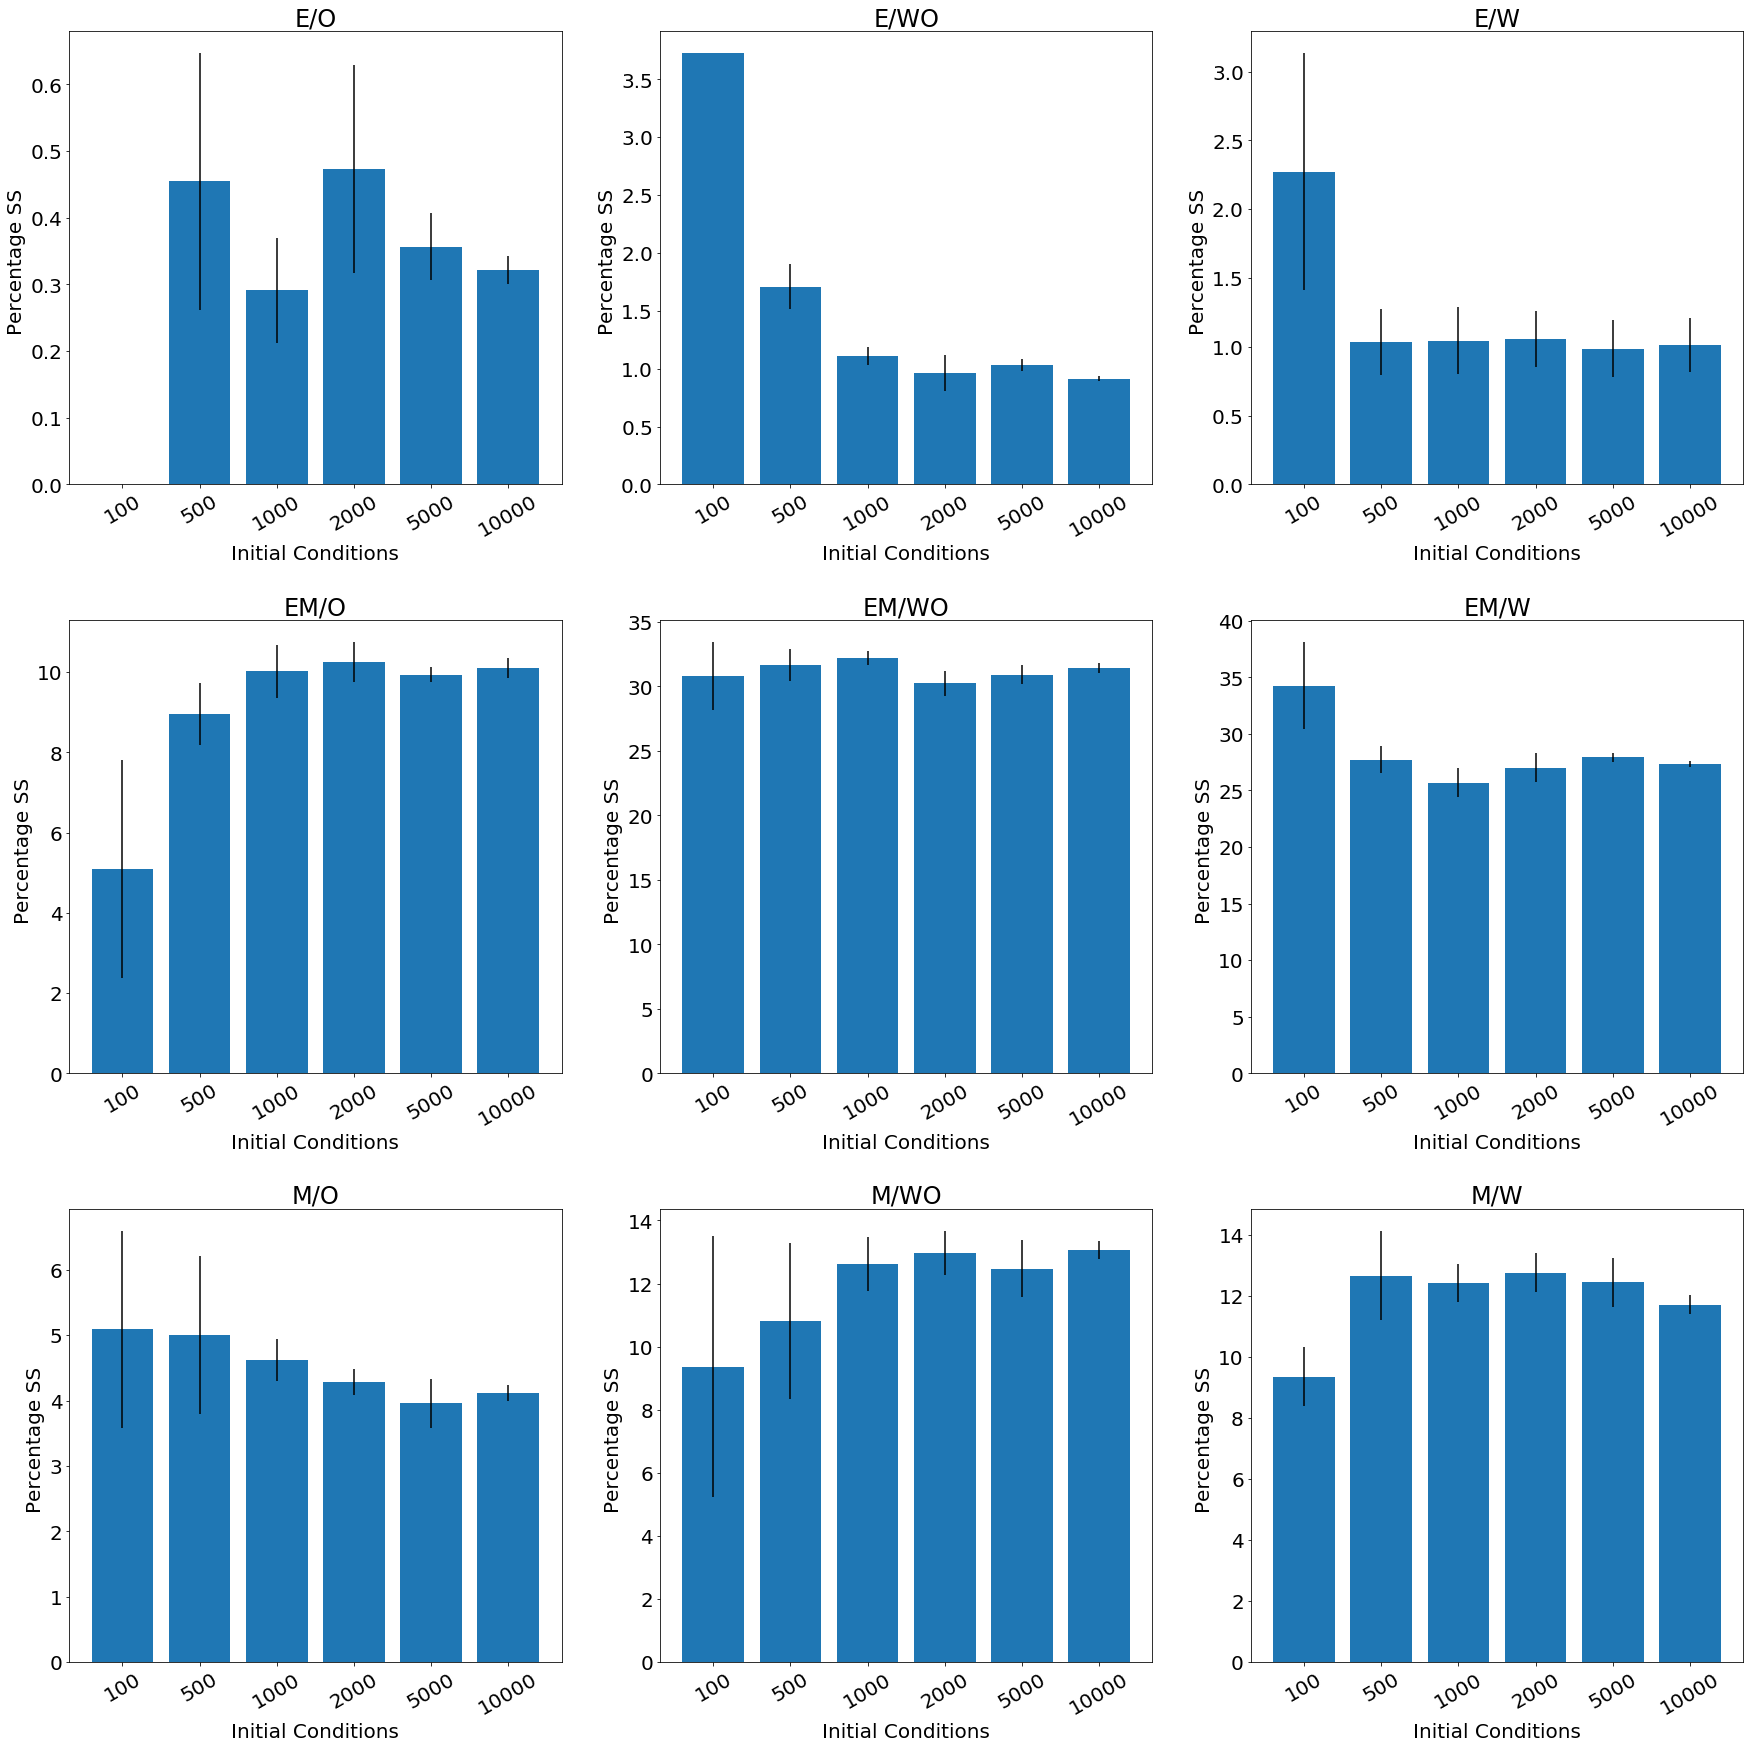

{'EM': [array([  100,   500,  1000,  2000,  5000, 10000]), array([70.18181818, 68.30909091, 67.88181818, 67.48181818, 68.74181818,
       68.85181818]), array([1.89823755, 1.74640126, 0.89016667, 1.02519903, 0.76002175,
       0.28073987])], 'E': [array([  100,   500,  1000,  2000,  5000, 10000]), array([6.        , 3.2       , 2.44545455, 2.49090909, 2.37454545,
       2.25181818]), array([3.49024615, 1.14415511, 0.68935231, 0.46261027, 0.36948031,
       0.23621324])], 'WO': [array([  100,   500,  1000,  2000,  5000, 10000]), array([43.90909091, 44.16363636, 45.9       , 44.15909091, 44.38909091,
       45.37909091]), array([2.87479787, 2.88042697, 0.76157731, 1.2713304 , 1.20119225,
       0.62960961])], 'unknown': [array([  100,   500,  1000,  2000,  5000, 10000]), array([-100., -100., -100., -100., -100., -100.]), array([0., 0., 0., 0., 0., 0.])], 'M': [array([  100,   500,  1000,  2000,  5000, 10000]), array([23.81818182, 28.49090909, 29.67272727, 30.02727273, 28.88363636,
      

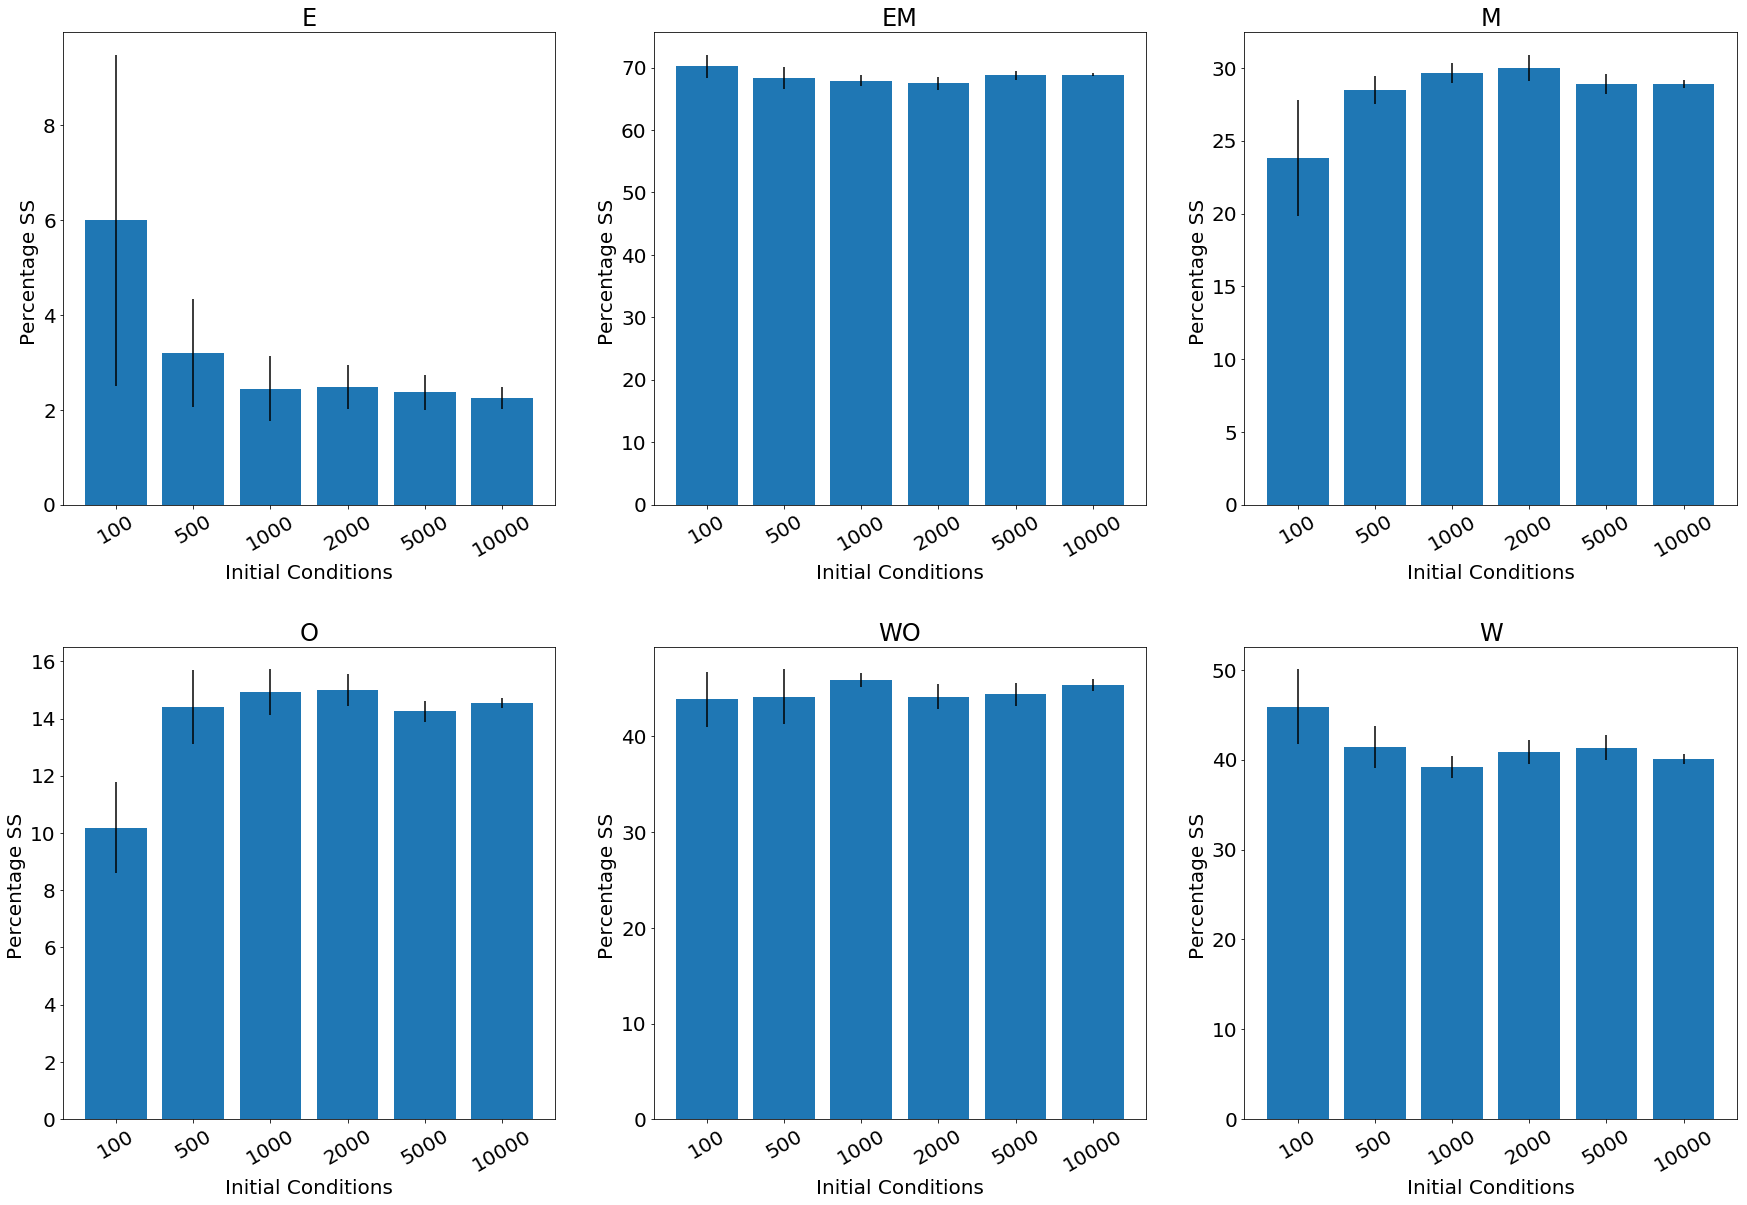

In [50]:
plotCompAll(regs)